<a href="https://colab.research.google.com/github/Adenugaoh/Prediction-of-Pregnancy-Risks/blob/main/Prediction_of_Pregnancy_Risks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries to start analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



# Dataset was sourced from https://archive.ics.uci.edu/dataset/863/maternal+health+risk

In [ ]:
#Mount drive and access data file
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Maternal Health Risk Data Set.csv')



Mounted at /content/drive


In [ ]:
from IPython.display import Javascript

display(Javascript('''
  google.colab.output.setIframeHeight(0, true, {maxHeight: 5000}); // Adjust maxHeight as needed
'''))


<IPython.core.display.Javascript object>

DATA UNDERSTANDING

In [ ]:
#Brief display of the dataset
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# Statistical information about the dataset
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
# Overview of the features and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
#Count of each category of the target variable ie size
grouprisk = data.groupby('RiskLevel')
grouprisk.size()

,0
RiskLevel,
high risk,272
low risk,406
mid risk,336


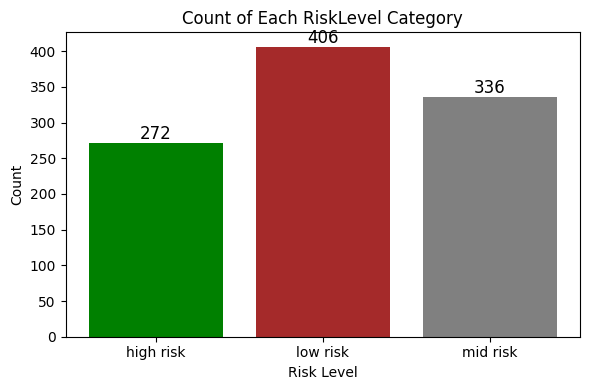

In [ ]:
# Visualise the target variable with a bar chart
risk_counts = grouprisk.size()

plt.figure(figsize=(6, 4))
bars = plt.bar(risk_counts.index, risk_counts, color=['green', 'brown', 'grey'])

# Add count labels on each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(bar.get_height()), ha='center', va='bottom', fontsize=12)

plt.title('Count of Each RiskLevel Category')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.xticks()
plt.yticks()


plt.tight_layout()
plt.show()


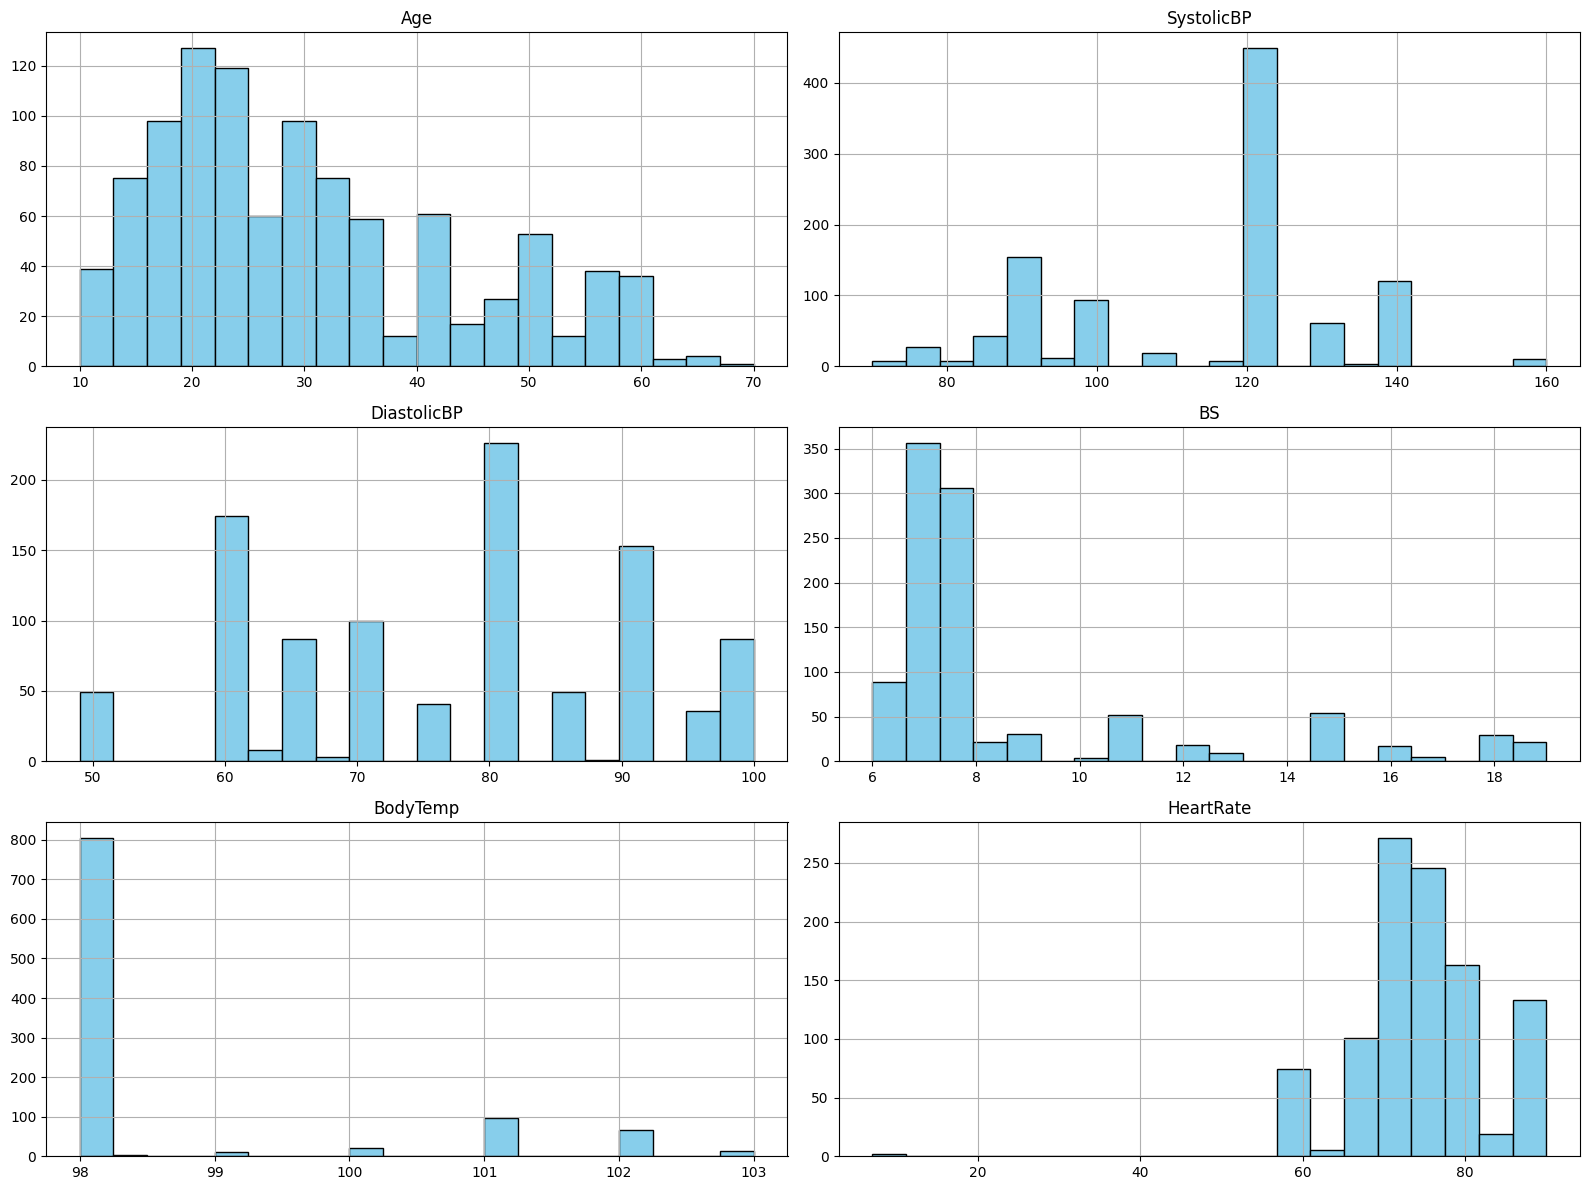

In [ ]:
# Plot histogram for each column in the dataset to show distribution
data.hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

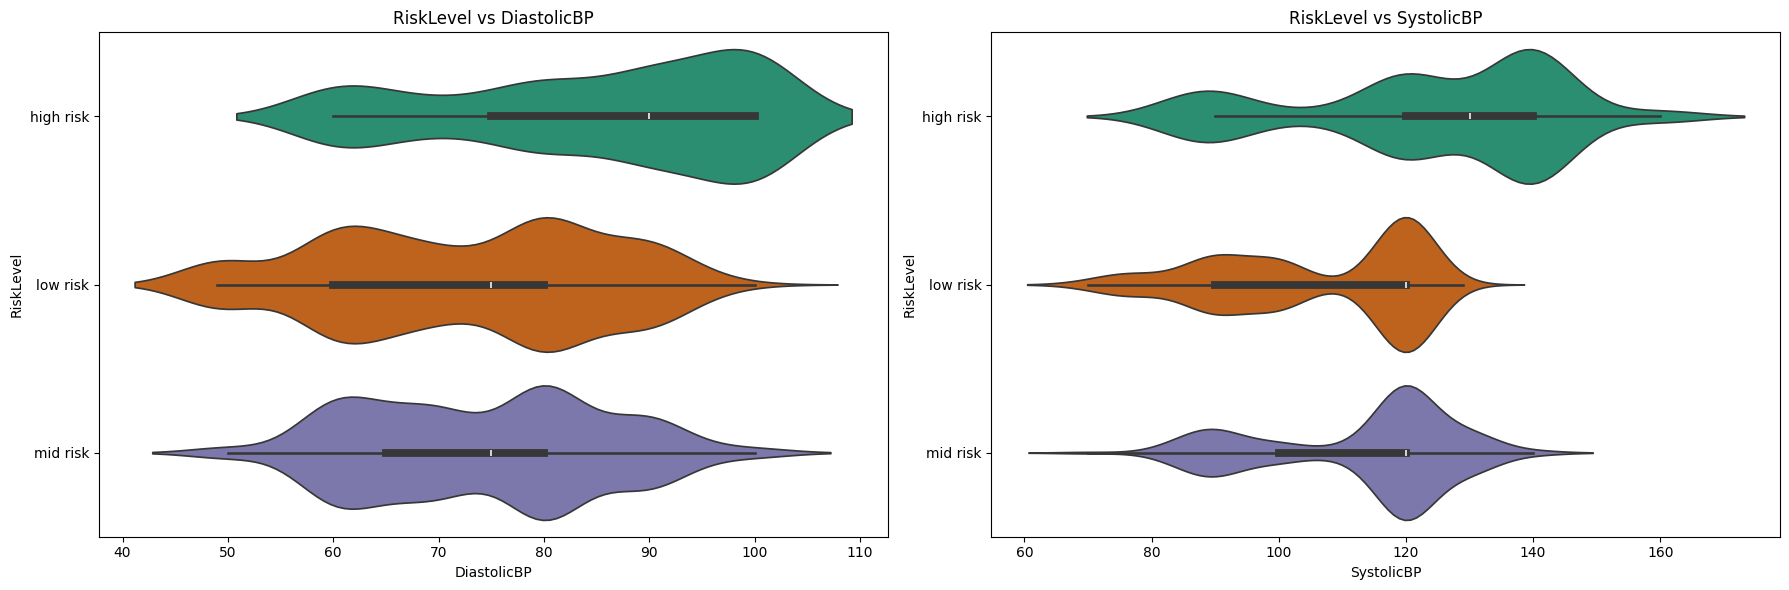

In [ ]:
# Visualisation of the relationship between the BP features and target variable ie RiskLevel

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Violin plot for RiskLevel vs DiastolicBP
sns.violinplot(data=data, x='DiastolicBP', y='RiskLevel', hue='RiskLevel', inner='box', palette='Dark2', ax=axes[0], legend=False)
axes[0].set_title('RiskLevel vs DiastolicBP')

# Violin plot for RiskLevel vs SystolicBP
sns.violinplot(data=data, x='SystolicBP', y='RiskLevel', hue='RiskLevel', inner='box', palette='Dark2', ax=axes[1], legend=False)
axes[1].set_title('RiskLevel vs SystolicBP')

plt.tight_layout()
plt.show()

In [ ]:
# Age distribution analysis of the dataset
# Count and records of those above the age of 60 years
elderly = data[data.Age > 60]
elderly_above_60 = len(elderly)
print(f"Within this dataset, there are {elderly_above_60} women above the age of 60 years.\n")

print(f"Records of those above 60 years:\n{elderly}\n")


# Count and records of those in their pre-teenage years
pre_teenagers = data[data.Age < 13]
pre_teenagers_count = len(pre_teenagers)
print(f"There are {pre_teenagers_count} pre-teenagers within the dataset.\n")

print(f"Records of the pre-teenagers:\n{pre_teenagers}\n")


Within this dataset, there are 8 women above the age of 60 years.

Records of those above 60 years:
     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
114   63         140           90  15.0      98.0         90  high risk
313   62         120           80   6.9      98.0         66   low risk
322   65          90           60   6.9      98.0         70   low risk
326   66          85           60   6.9      98.0         86   low risk
338   70          85           60   6.9     102.0         70   low risk
339   65         120           90   6.9     103.0         76   low risk
435   65         130           80  15.0      98.0         86  high risk
502   63         140           90  15.0      98.0         90  high risk

There are 39 pre-teenagers within the dataset.

Records of the pre-teenagers:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
19     10          70           50   6.9      98.0         70   low risk
35     12          95      

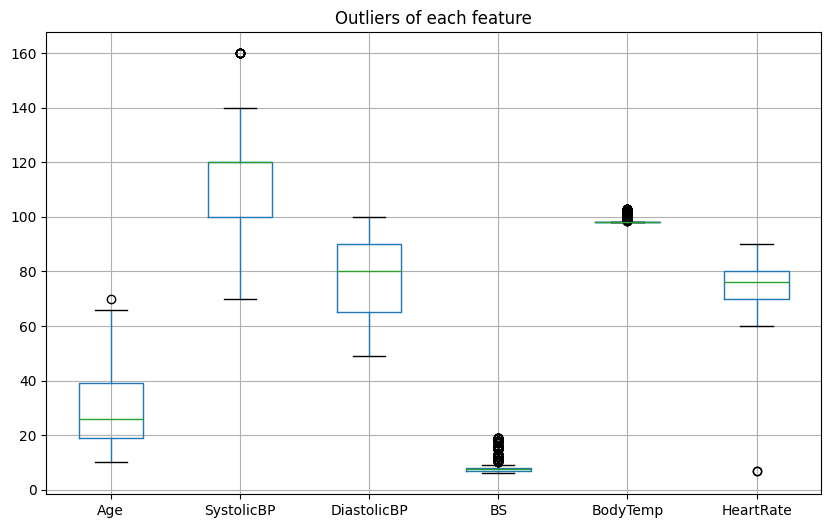

In [ ]:
# Visual representation of outliers with boxplots
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Outliers of each feature')
plt.show()

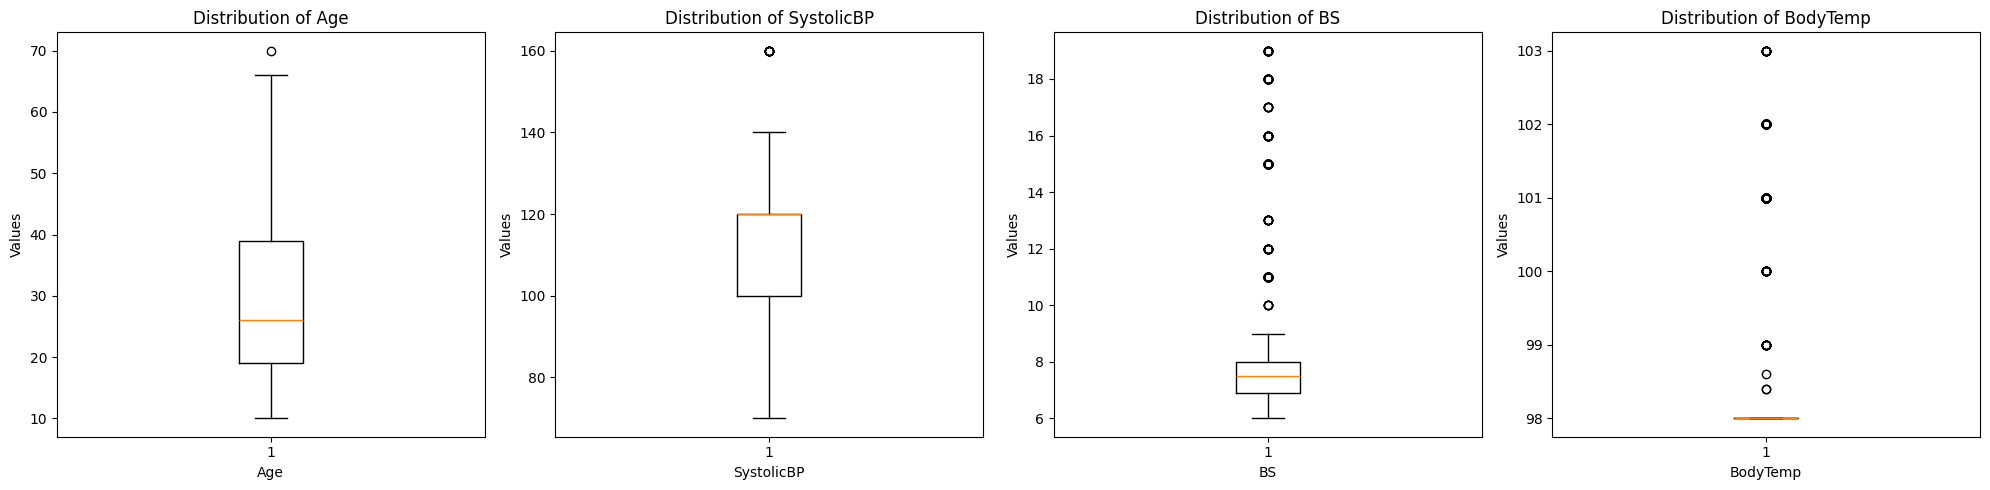

In [ ]:
# Boxplots for selected features of the dataset
selected_features = ['Age', 'SystolicBP', 'BS', 'BodyTemp']

# To create a single figure with subplots
plt.figure(figsize=(20, 5))

# Loop through each feature within selected_features and create a boxplot for each
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i + 1)  # Subplots in a single row
    plt.boxplot(data[feature])
    plt.title(f'Distribution of {feature}')  # Set title with feature name
    plt.xlabel(feature)
    plt.ylabel('Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

EXPLORATORY DATA ANALYSIS

In [ ]:
# convert the column `BodyTemp` to celcius unit
data['BodyTemp'] = data['BodyTemp'].apply(lambda x: round((x-32) * (5/9), 2))
data['BodyTemp']

,BodyTemp
0,36.67
1,36.67
2,37.78
3,36.67
4,36.67
...,...
1009,36.67
1010,36.67
1011,36.67
1012,36.67


In [ ]:
#Count of patients by their temperature
data.BodyTemp.value_counts()

,count
BodyTemp,
36.67,804
38.33,98
38.89,66
37.78,20
39.44,13
37.22,10
36.89,2
37.00,1


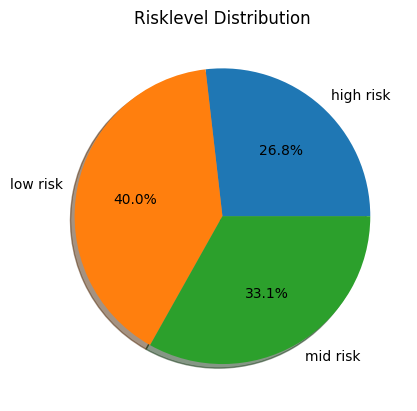

In [ ]:
# Visualisation of RiskLevel distribution in the dataset with a pie chart

grouprisk = data.groupby('RiskLevel')
group_sizes = grouprisk.size()

labels = group_sizes.index
sizes = group_sizes.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%',  shadow=True)

plt.title('Risklevel Distribution')
plt.show()

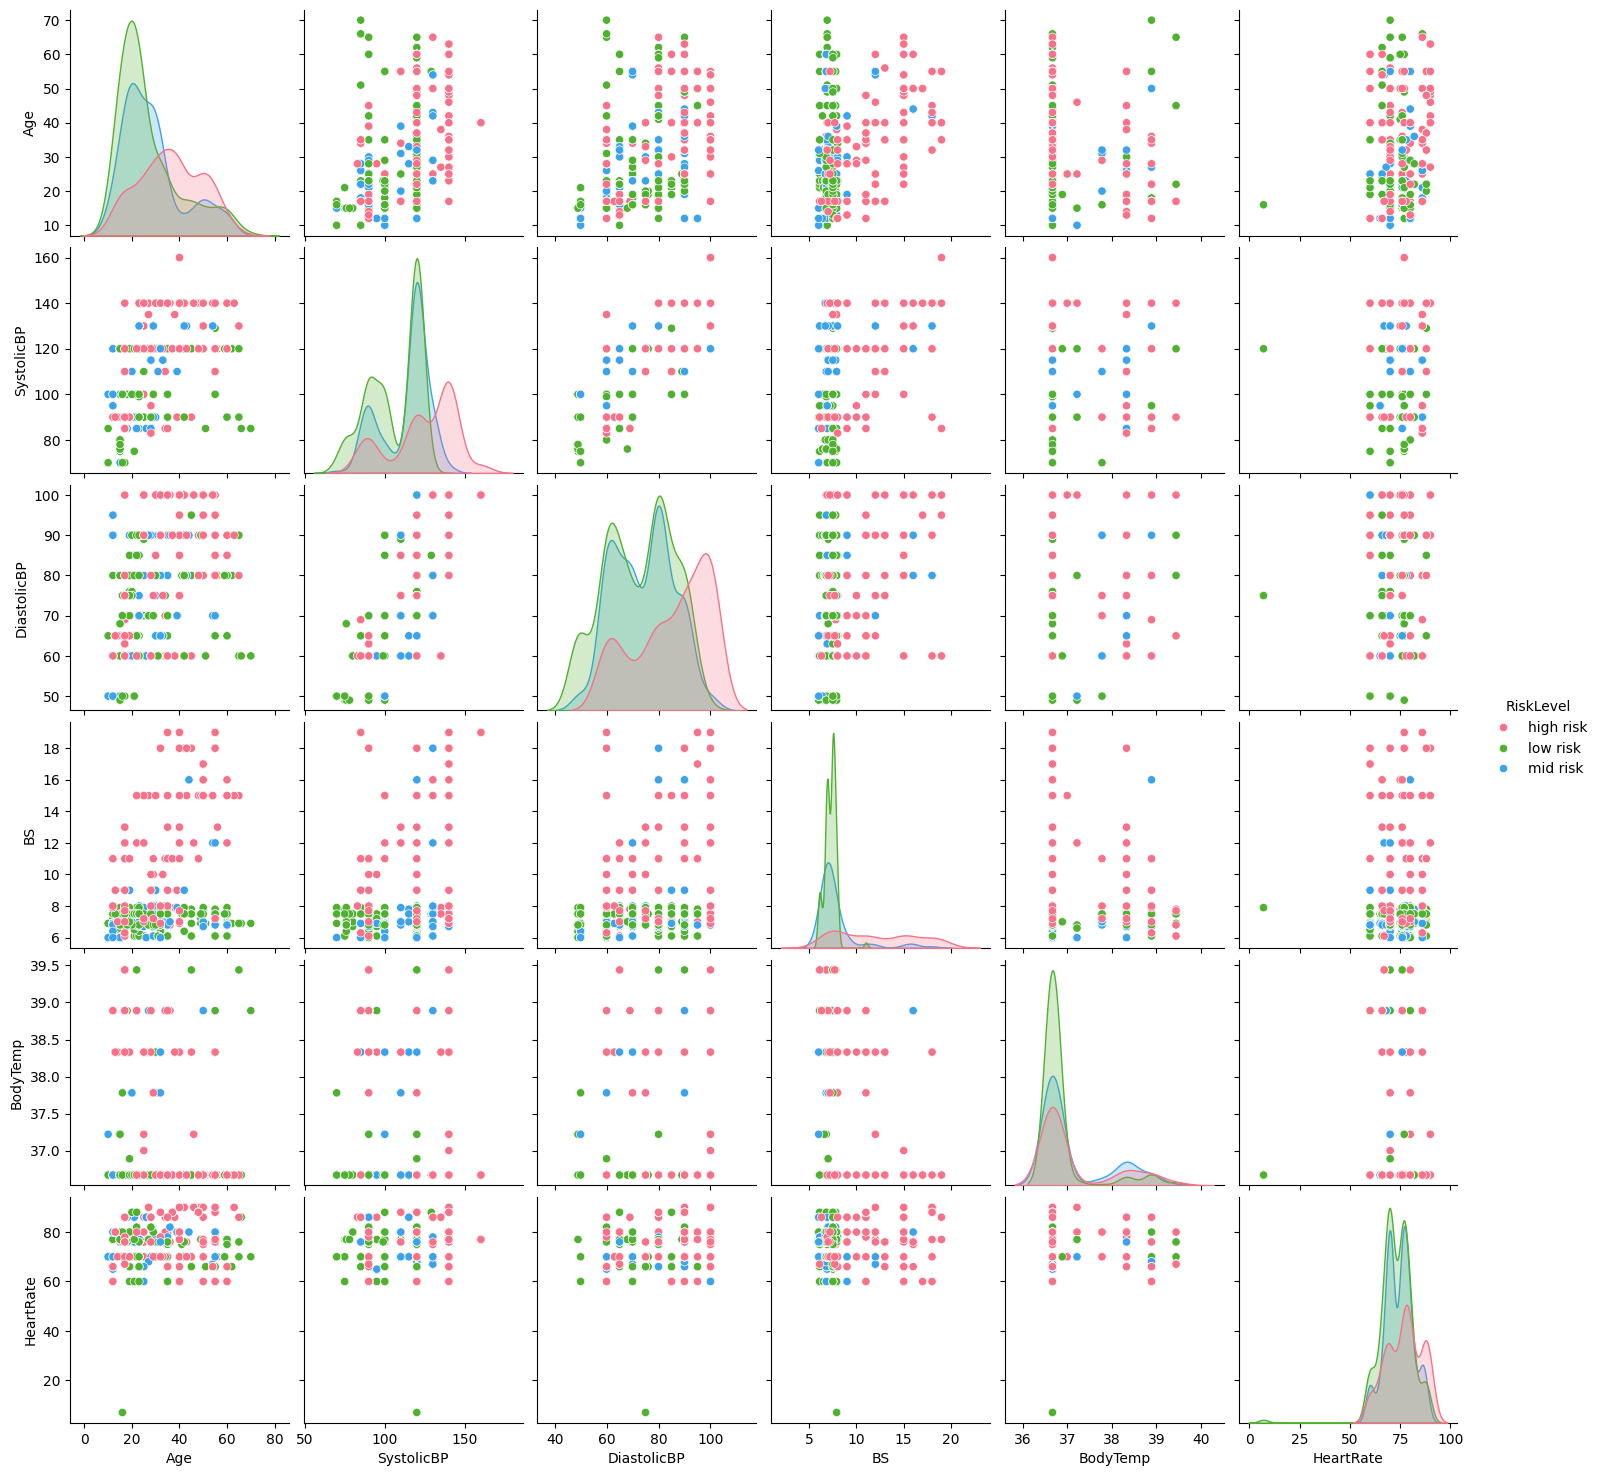

In [ ]:
# Visualize the dataset
sns.pairplot(data, hue="RiskLevel", palette="husl")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical column i.e. 'RiskLevel'
le = LabelEncoder()

data['RiskLevel_Encoded'] = le.fit_transform(data['RiskLevel'])

# Mapping of the encoded values
mapping_df = pd.DataFrame({'Category': le.classes_, 'Encoded': range(len(le.classes_))})
print(mapping_df)

    Category  Encoded
0  high risk        0
1   low risk        1
2   mid risk        2


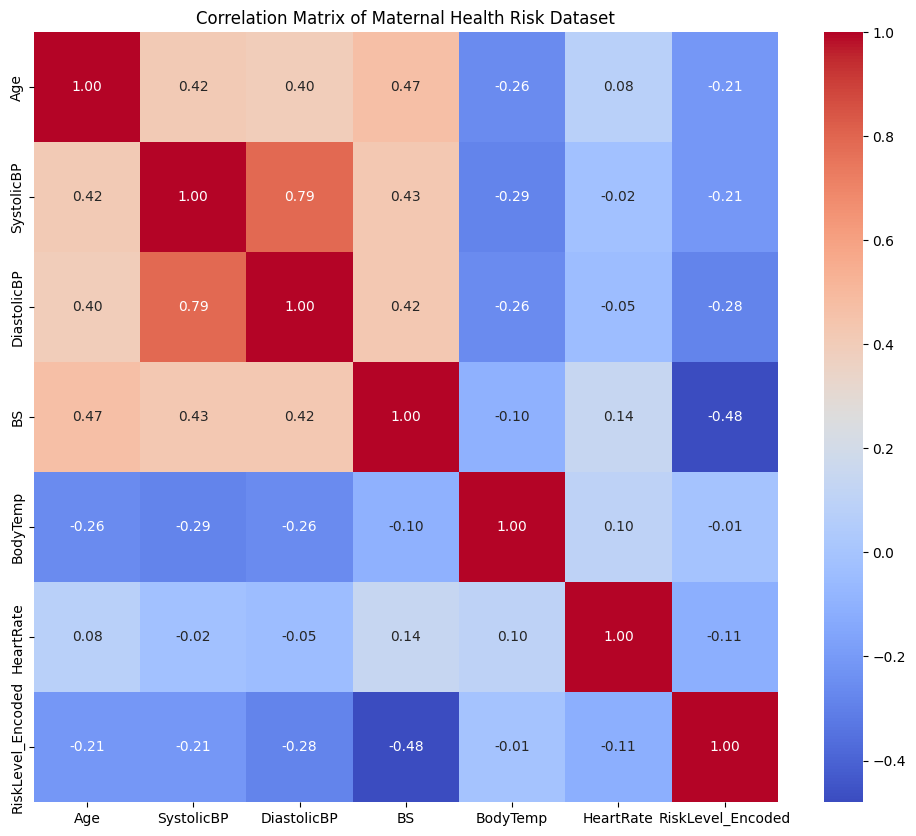

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Display the correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Maternal Health Risk Dataset')
plt.show()

PREPROCESSING

In [ ]:
## Data preparation for training
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=122)

print('Training dataset shape: ', train.shape)
print('Test dataset shape: ', test.shape, '\n')


# Seperate feature matrix and target vector
Xtrain = train.drop(columns=['RiskLevel', 'RiskLevel_Encoded'], axis=1)
ytrain = train['RiskLevel_Encoded']
Xtest = test.drop(columns=['RiskLevel', 'RiskLevel_Encoded'], axis=1)
ytest = test['RiskLevel_Encoded']

print('Xtrain shape: ', Xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print('Xtest shape: ', Xtest.shape)
print('ytest shape: ', ytest.shape)

Training dataset shape:  (811, 8)
Test dataset shape:  (203, 8) 

Xtrain shape:  (811, 6)
ytrain shape:  (811,)
Xtest shape:  (203, 6)
ytest shape:  (203,)


## MODEL TRAINING AND EVALUATION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 15, 18, 20, 22],
    'min_samples_split': [2, 3, 4, 6],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
}

# Create and fit the GridSearchCV object
grid_search_tree = GridSearchCV(
    tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)

grid_search_tree.fit(Xtrain, ytrain)

# Best Decision Tree model
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Accuracy (Cross-validation): ', grid_search_tree.best_score_)





Best Parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best Accuracy (Cross-validation):  0.7632280542300991


Decision Tree Training Accuracy:  0.8581997533908755
Decision Tree Test Accuracy:  0.7832512315270936 

Classification Report (Decision Tree) on Test Data:
              precision    recall  f1-score   support

   high risk       0.82      0.90      0.86        51
    low risk       0.86      0.75      0.80        88
    mid risk       0.67      0.73      0.70        64

    accuracy                           0.78       203
   macro avg       0.78      0.80      0.79       203
weighted avg       0.79      0.78      0.78       203



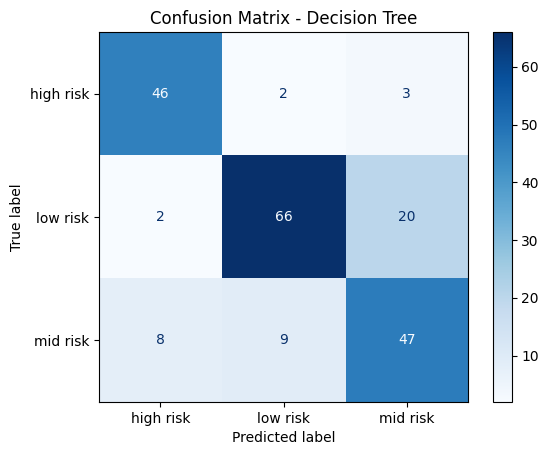


 Multi-Class AUC-ROC Score:  0.9098919490950639 



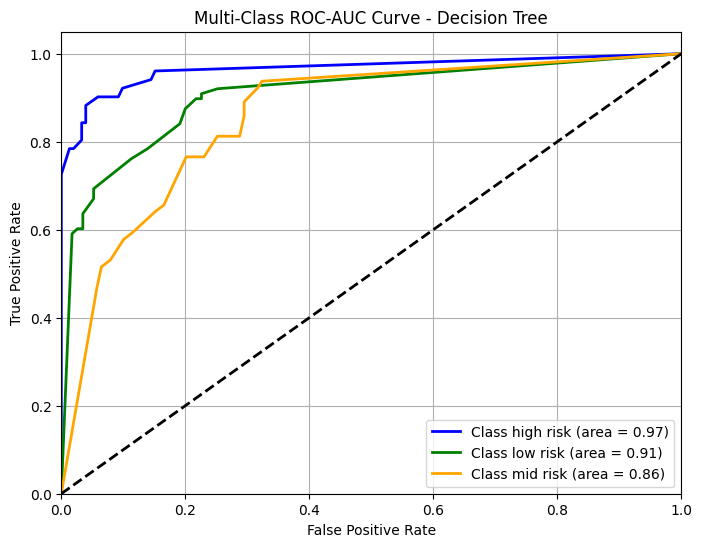

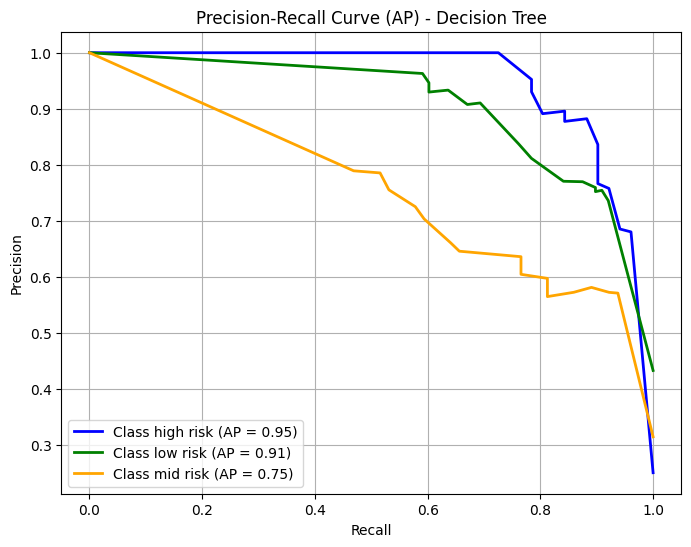

In [ ]:
## Evaluation of Decision Tree model
# Using the best model
best_tree = grid_search_tree.best_estimator_


# Evaluate training and test accuracies
train_accuracy = best_tree.score(Xtrain, ytrain)
test_accuracy = best_tree.score(Xtest, ytest)

#print('Decision Tree Training Accuracy: ', train_accuracy)
#print('Decision Tree Test Accuracy: ', test_accuracy, '\n')

# Generate a classification report for the test data
y_pred = best_tree.predict(Xtest)
#print("Classification Report (Decision Tree) on Test Data:")
#print(classification_report(ytest, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
#plt.show()

# ROC-AUC (One-vs-Rest Approach for Multi-Class)
ytest_binarized = label_binarize(ytest, classes=np.arange(len(le.classes_)))
y_pred_prob = best_tree.predict_proba(Xtest)

roc_auc_mclass = roc_auc_score(ytest_binarized, y_pred_prob, average='macro', multi_class='ovr')
#print('\n', "Multi-Class AUC-ROC Score: ", roc_auc_mclass, '\n')


fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(ytest_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC-AUC Curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {le.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC-AUC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
#plt.show()

# Average Precision (AP) Graph
precision = {}
recall = {}
average_precision = {}

for i in range(len(le.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(ytest_binarized[:, i], y_pred_prob[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Class {le.classes_[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP) - Decision Tree')
plt.legend(loc="best")
plt.grid()
#plt.show()


Decision Tree Training Accuracy:  0.8581997533908755
Decision Tree Test Accuracy:  0.7832512315270936 

Classification Report (Decision Tree) on Test Data:
              precision    recall  f1-score   support

   high risk       0.82      0.90      0.86        51
    low risk       0.86      0.75      0.80        88
    mid risk       0.67      0.73      0.70        64

    accuracy                           0.78       203
   macro avg       0.78      0.80      0.79       203
weighted avg       0.79      0.78      0.78       203



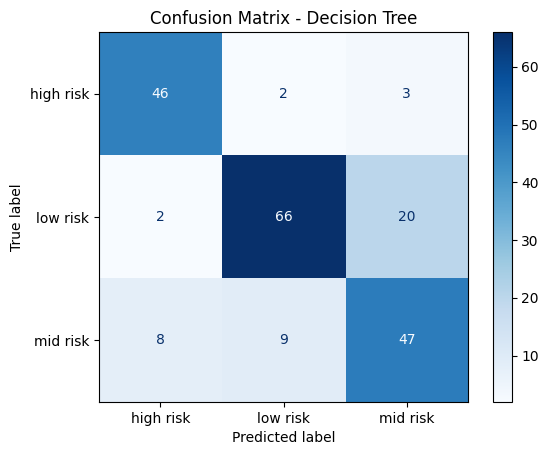


 Multi-Class AUC-ROC Score:  0.9098919490950639 



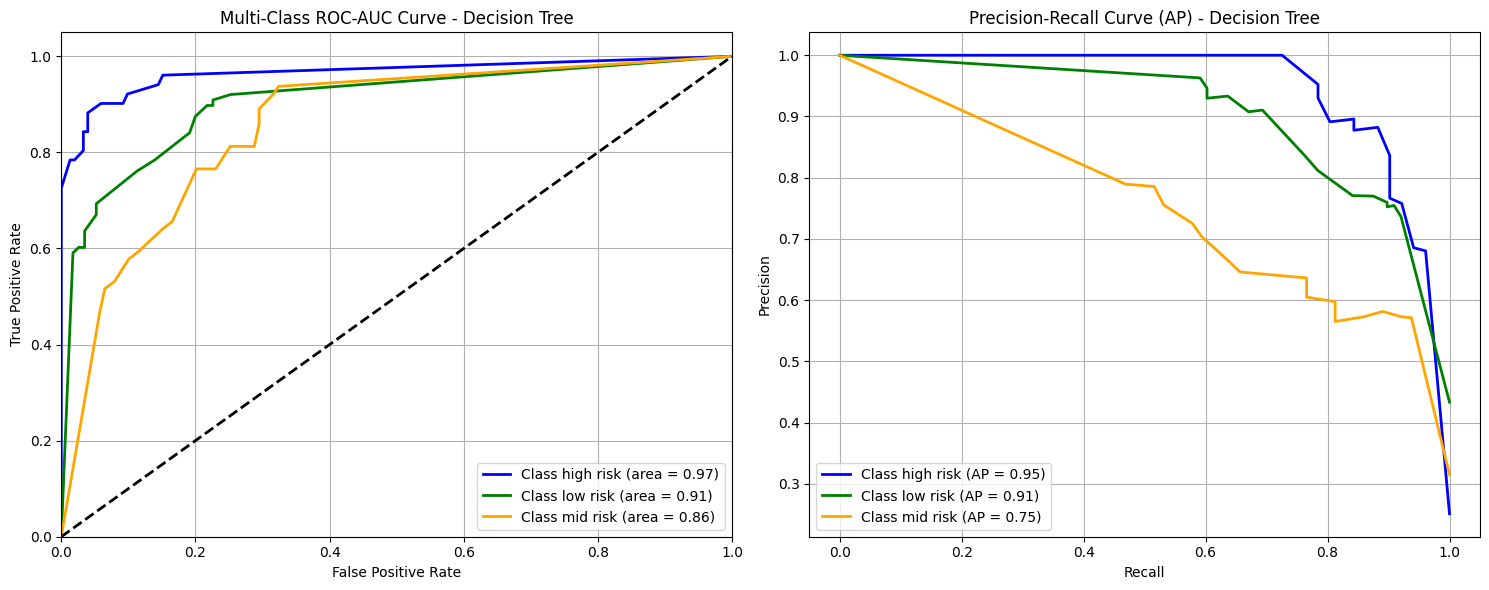

In [ ]:
## Evaluation of Decision Tree model
# Using the best model
best_tree = grid_search_tree.best_estimator_


# Evaluate training and test accuracies
train_accuracy = best_tree.score(Xtrain, ytrain)
test_accuracy = best_tree.score(Xtest, ytest)

print('Decision Tree Training Accuracy: ', train_accuracy)
print('Decision Tree Test Accuracy: ', test_accuracy, '\n')

# Generate a classification report for the test data
y_pred = best_tree.predict(Xtest)
print("Classification Report (Decision Tree) on Test Data:")
print(classification_report(ytest, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# ROC-AUC (One-vs-Rest Approach for Multi-Class)
ytest_binarized = label_binarize(ytest, classes=np.arange(len(le.classes_)))
y_pred_prob = best_tree.predict_proba(Xtest)

roc_auc_mclass = roc_auc_score(ytest_binarized, y_pred_prob, average='macro', multi_class='ovr')
print('\n', "Multi-Class AUC-ROC Score: ", roc_auc_mclass, '\n')

fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(ytest_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot ROC-AUC and Precision-Recall curves side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create 1 row, 2 columns of subplots

# ROC Curve for each class
colors = ['blue', 'green', 'orange']
for i, color in enumerate(colors):
    axes[0].plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {le.classes_[i]} (area = {roc_auc[i]:.2f})')

axes[0].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Multi-Class ROC-AUC Curve - Decision Tree')
axes[0].legend(loc="lower right")
axes[0].grid()


# Average Precision (AP) Graph
precision = {}
recall = {}
average_precision = {}

for i in range(len(le.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(ytest_binarized[:, i], y_pred_prob[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Average Precision (AP) for each class
for i, color in enumerate(colors):
    axes[1].plot(recall[i], precision[i], color=color, lw=2,
                 label=f'Class {le.classes_[i]} (AP = {average_precision[i]:.2f})')

axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve (AP) - Decision Tree')
axes[1].legend(loc="best")
axes[1].grid()

plt.tight_layout()
plt.show()


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=122)

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(Xtrain, ytrain)

# Best Random Forest model
best_rf = rf_grid.best_estimator_
print('Best Parameters: ', rf_grid.best_params_)
print('Best Cross-Validation Accuracy: ', rf_grid.best_score_)

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Accuracy:  0.8298568507157464


Random Forest Training Accuracy:  0.9260172626387176
Random Forest Test Accuracy:  0.8374384236453202 

Random Forest Classification Report on Test Data:
              precision    recall  f1-score   support

   high risk       0.92      0.90      0.91        51
    low risk       0.88      0.80      0.83        88
    mid risk       0.74      0.84      0.79        64

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203



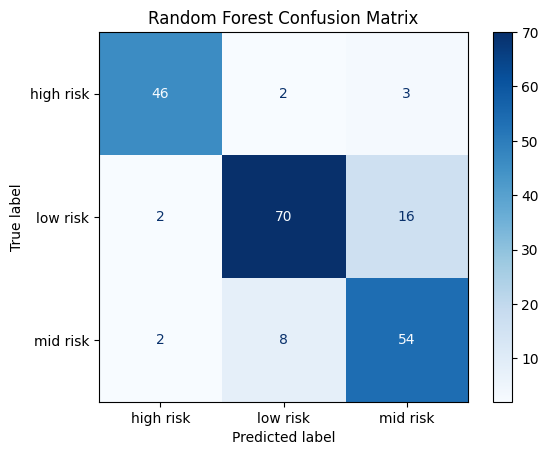


 Multi-Class AUC-ROC Score:  0.9532984845588207 



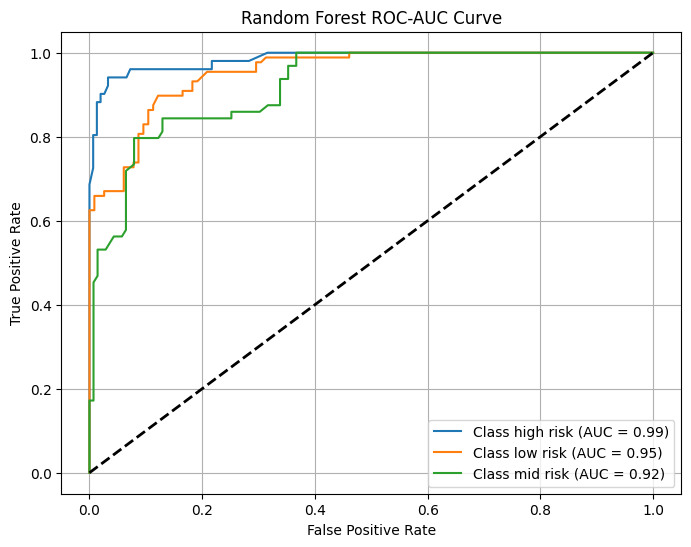

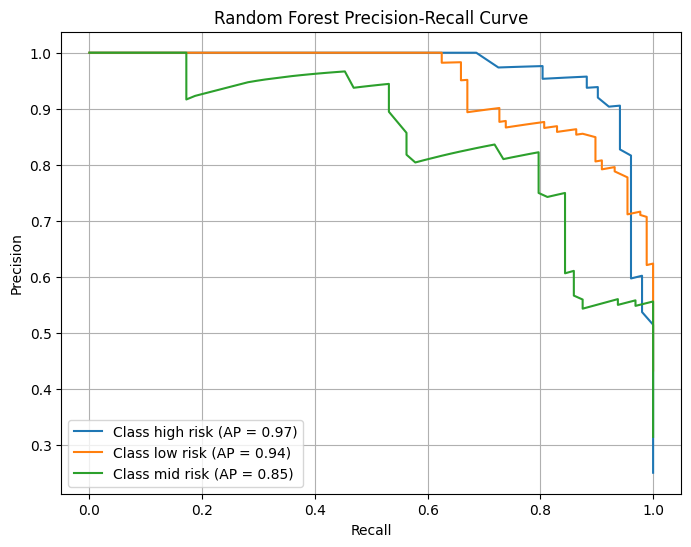

In [ ]:
## Evaluation of Random Forest model
# Evaluate Random Forest on test set
rf_train_accuracy = best_rf.score(Xtrain, ytrain)
rf_test_accuracy = best_rf.score(Xtest, ytest)

#print('Random Forest Training Accuracy: ', rf_train_accuracy)
#print('Random Forest Test Accuracy: ', rf_test_accuracy, '\n')

# Classification Report
rf_y_pred = best_rf.predict(Xtest)
#print("Random Forest Classification Report on Test Data:")
#print(classification_report(ytest, rf_y_pred, target_names=le.classes_))


# Confusion Matrix
rf_conf_matrix = confusion_matrix(ytest, rf_y_pred)
ConfusionMatrixDisplay(rf_conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
#plt.show()

# Random Forest ROC-AUC (One-vs-Rest Approach for Multi-Class)
rf_y_pred_prob = best_rf.predict_proba(Xtest)

roc_auc_mclass_rf = roc_auc_score(ytest_binarized, rf_y_pred_prob, average='macro', multi_class='ovr')
#print('\n', "Multi-Class AUC-ROC Score: ", roc_auc_mclass_rf, '\n')


# ROC-AUC Curve for Random Forest

fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}
for i in range(len(le.classes_)):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(ytest_binarized[:, i], rf_y_pred_prob[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

plt.figure(figsize=(8, 6))
for i, color in enumerate(['blue', 'green', 'orange']):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc_rf[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Random Forest ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
#plt.show()

# Precision-Recall for Random Forest
precision_rf, recall_rf, ap_rf = {}, {}, {}
for i in range(len(le.classes_)):
    precision_rf[i], recall_rf[i], _ = precision_recall_curve(ytest_binarized[:, i], rf_y_pred_prob[:, i])
    ap_rf[i] = auc(recall_rf[i], precision_rf[i])

plt.figure(figsize=(8, 6))
for i, color in enumerate(['blue', 'green', 'orange']):
    plt.plot(recall_rf[i], precision_rf[i], label=f'Class {le.classes_[i]} (AP = {ap_rf[i]:.2f})')

plt.title("Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid()
#plt.show()



Random Forest Training Accuracy:  0.9260172626387176
Random Forest Test Accuracy:  0.8374384236453202 

Random Forest Classification Report on Test Data:
              precision    recall  f1-score   support

   high risk       0.92      0.90      0.91        51
    low risk       0.88      0.80      0.83        88
    mid risk       0.74      0.84      0.79        64

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203



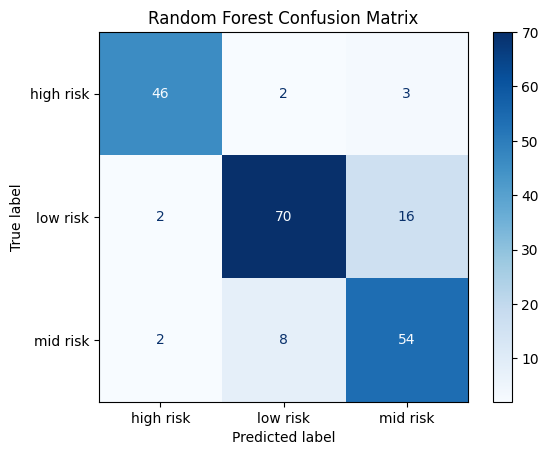


 Multi-Class AUC-ROC Score:  0.9532984845588207 



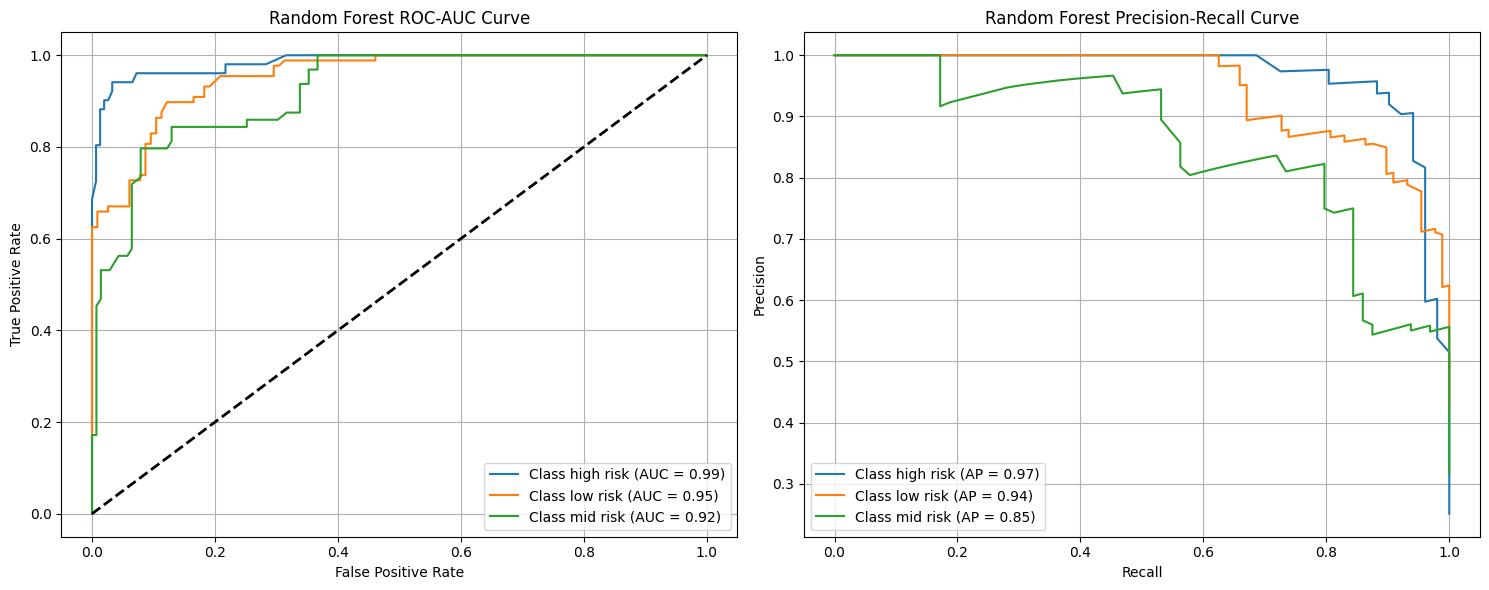

In [ ]:
## Evaluation of Random Forest model
# Evaluate Random Forest on test set
rf_train_accuracy = best_rf.score(Xtrain, ytrain)
rf_test_accuracy = best_rf.score(Xtest, ytest)

print('Random Forest Training Accuracy: ', rf_train_accuracy)
print('Random Forest Test Accuracy: ', rf_test_accuracy, '\n')

# Classification Report
rf_y_pred = best_rf.predict(Xtest)
print("Random Forest Classification Report on Test Data:")
print(classification_report(ytest, rf_y_pred, target_names=le.classes_))


# Confusion Matrix
rf_conf_matrix = confusion_matrix(ytest, rf_y_pred)
ConfusionMatrixDisplay(rf_conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Random Forest ROC-AUC (One-vs-Rest Approach for Multi-Class)
rf_y_pred_prob = best_rf.predict_proba(Xtest)

roc_auc_mclass_rf = roc_auc_score(ytest_binarized, rf_y_pred_prob, average='macro', multi_class='ovr')
print('\n', "Multi-Class AUC-ROC Score: ", roc_auc_mclass_rf, '\n')


# ROC-AUC and Precision-Recall curves side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# ROC-AUC Curve
fpr_rf, tpr_rf, roc_auc_rf = {}, {}, {}
for i in range(len(le.classes_)):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(ytest_binarized[:, i], rf_y_pred_prob[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])
    axes[0].plot(fpr_rf[i], tpr_rf[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc_rf[i]:.2f})')

axes[0].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0].set_title("Random Forest ROC-AUC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Precision-Recall Curve
precision_rf, recall_rf, ap_rf = {}, {}, {}
for i in range(len(le.classes_)):
    precision_rf[i], recall_rf[i], _ = precision_recall_curve(ytest_binarized[:, i], rf_y_pred_prob[:, i])
    ap_rf[i] = auc(recall_rf[i], precision_rf[i])
    axes[1].plot(recall_rf[i], precision_rf[i], label=f'Class {le.classes_[i]} (AP = {ap_rf[i]:.2f})')

axes[1].set_title("Random Forest Precision-Recall Curve")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend(loc="best")
axes[1].grid()

plt.tight_layout()
plt.show()

### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=122)

# Hyperparameter tuning for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(svc, svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(Xtrain, ytrain)

# Best SVC model
best_svc = svc_grid.best_estimator_
print('Best Parameters: ', svc_grid.best_params_)
print('Best Cross-Validation Accuracy: ', svc_grid.best_score_)

Best Parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Accuracy:  0.7447701280012119


SVC Training Accuracy:  0.8828606658446363
SVC Test Accuracy:  0.7832512315270936 

SVC Classification Report on Test Data:
              precision    recall  f1-score   support

   high risk       0.91      0.84      0.88        51
    low risk       0.76      0.80      0.78        88
    mid risk       0.72      0.72      0.72        64

    accuracy                           0.78       203
   macro avg       0.80      0.79      0.79       203
weighted avg       0.79      0.78      0.78       203



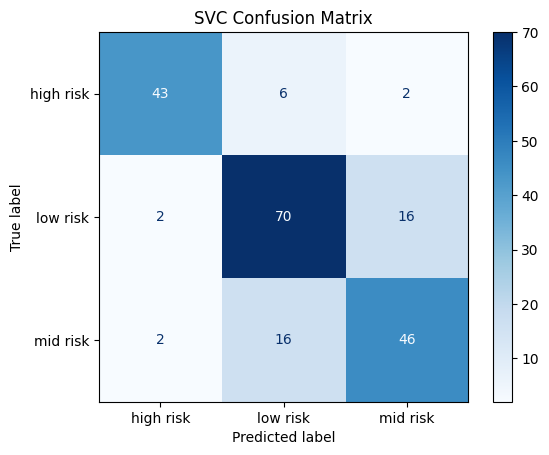


 Multi-Class AUC-ROC Score:  0.9017370215081133 



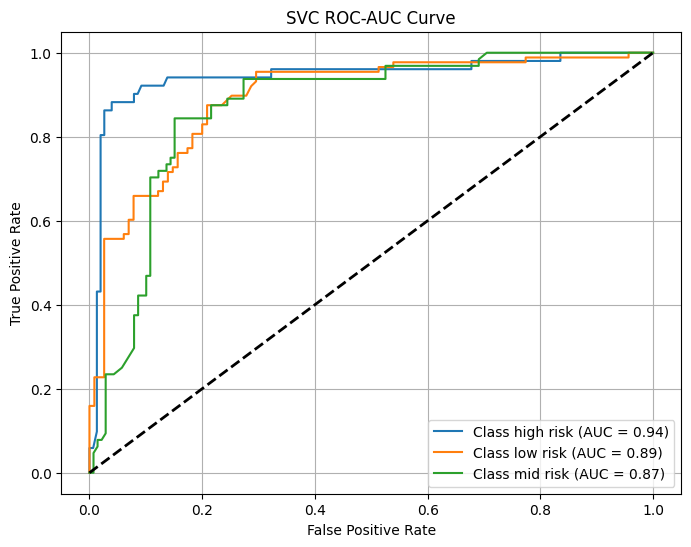

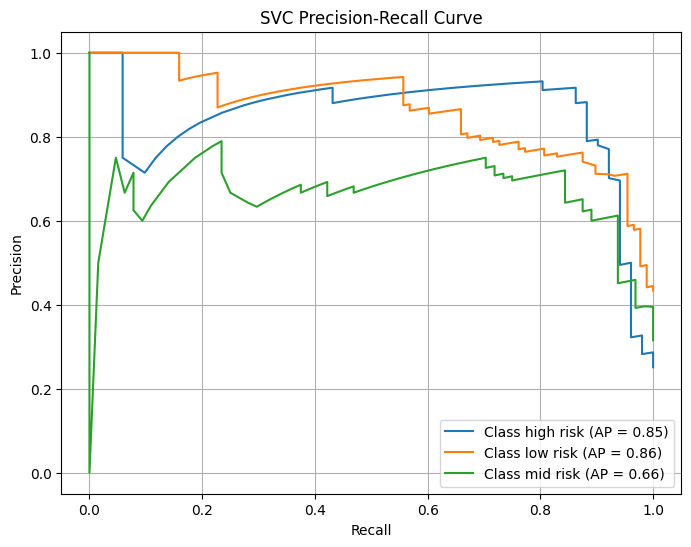

In [ ]:
## Evaluation of Support Vector Classifier
# Evaluate SVC on test set
svc_train_accuracy = best_svc.score(Xtrain, ytrain)
svc_test_accuracy = best_svc.score(Xtest, ytest)

#print('SVC Training Accuracy: ', svc_train_accuracy)
#print('SVC Test Accuracy: ', svc_test_accuracy, '\n')

# Classification Report
svc_y_pred = best_svc.predict(Xtest)
#print("SVC Classification Report on Test Data:")
#print(classification_report(ytest, svc_y_pred, target_names=le.classes_))



# Confusion Matrix
svc_conf_matrix = confusion_matrix(ytest, svc_y_pred)
ConfusionMatrixDisplay(svc_conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
plt.title("SVC Confusion Matrix")
#plt.show()


# SVC ROC-AUC (One-vs-Rest Approach for Multi-Class)
svc_y_pred_prob = best_svc.predict_proba(Xtest)

roc_auc_mclass_svc = roc_auc_score(ytest_binarized, svc_y_pred_prob, average='macro', multi_class='ovr')
#print('\n', "Multi-Class AUC-ROC Score: ", roc_auc_mclass_svc, '\n')




# ROC-AUC Curve for SVC

fpr_svc, tpr_svc, roc_auc_svc = {}, {}, {}
for i in range(len(le.classes_)):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(ytest_binarized[:, i], svc_y_pred_prob[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

plt.figure(figsize=(8, 6))
for i, color in enumerate(['blue', 'green', 'orange']):
    plt.plot(fpr_svc[i], tpr_svc[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc_svc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("SVC ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
#plt.show()

# Precision-Recall for SVC
precision_svc, recall_svc, ap_svc = {}, {}, {}
for i in range(len(le.classes_)):
    precision_svc[i], recall_svc[i], _ = precision_recall_curve(ytest_binarized[:, i], svc_y_pred_prob[:, i])
    ap_svc[i] = auc(recall_svc[i], precision_svc[i])

plt.figure(figsize=(8, 6))
for i, color in enumerate(['blue', 'green', 'orange']):
    plt.plot(recall_svc[i], precision_svc[i], label=f'Class {le.classes_[i]} (AP = {ap_svc[i]:.2f})')

plt.title("SVC Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid()
#plt.show()

SVC Training Accuracy:  0.8828606658446363
SVC Test Accuracy:  0.7832512315270936 

SVC Classification Report on Test Data:
              precision    recall  f1-score   support

   high risk       0.91      0.84      0.88        51
    low risk       0.76      0.80      0.78        88
    mid risk       0.72      0.72      0.72        64

    accuracy                           0.78       203
   macro avg       0.80      0.79      0.79       203
weighted avg       0.79      0.78      0.78       203



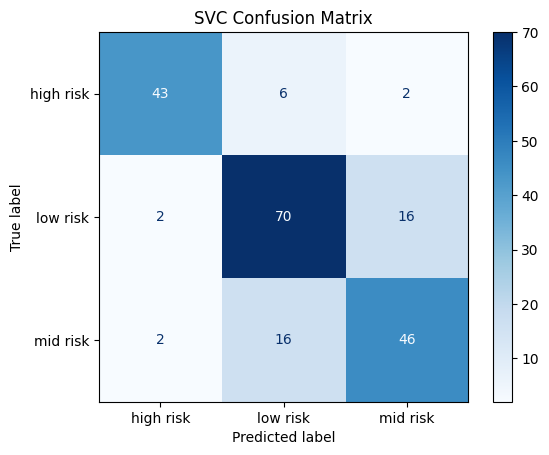


 Multi-Class AUC-ROC Score:  0.9017370215081133 



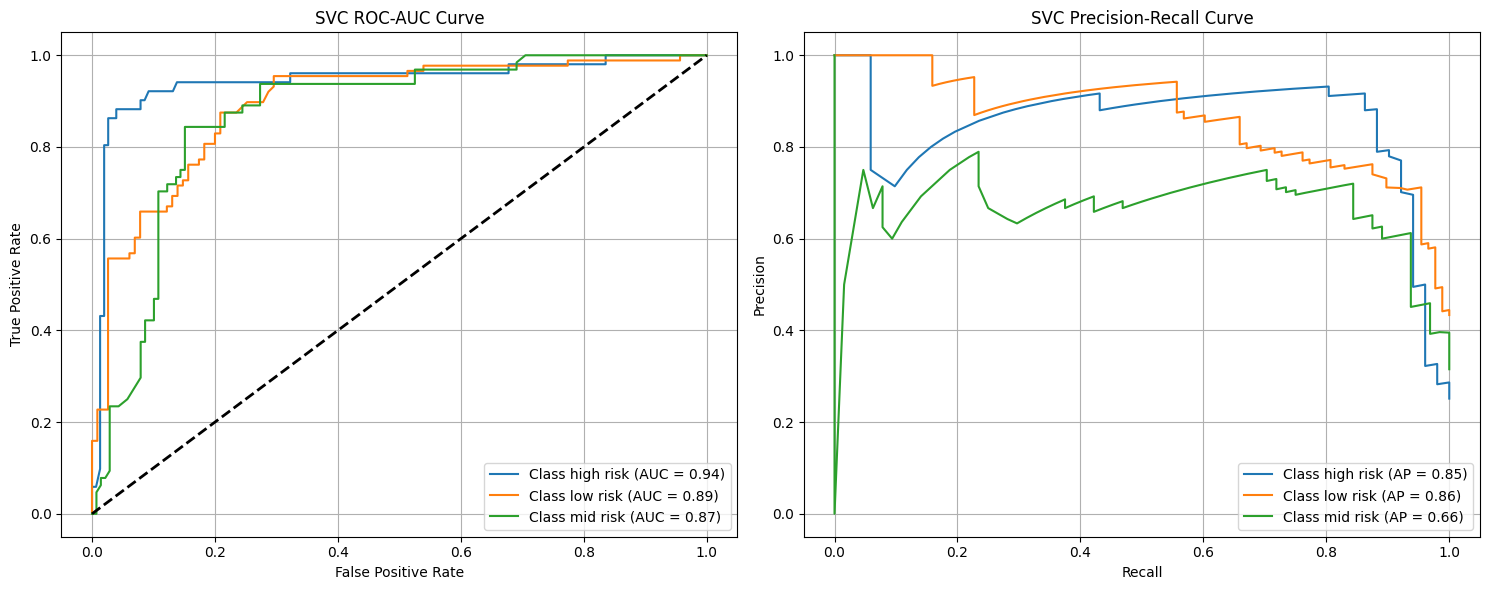

In [ ]:
## Evaluation of Support Vector Classifier
# Evaluate SVC on test set
svc_train_accuracy = best_svc.score(Xtrain, ytrain)
svc_test_accuracy = best_svc.score(Xtest, ytest)

print('SVC Training Accuracy: ', svc_train_accuracy)
print('SVC Test Accuracy: ', svc_test_accuracy, '\n')

# Classification Report
svc_y_pred = best_svc.predict(Xtest)
print("SVC Classification Report on Test Data:")
print(classification_report(ytest, svc_y_pred, target_names=le.classes_))

# Confusion Matrix
svc_conf_matrix = confusion_matrix(ytest, svc_y_pred)
ConfusionMatrixDisplay(svc_conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
plt.title("SVC Confusion Matrix")
plt.show()

# SVC ROC-AUC (One-vs-Rest Approach for Multi-Class)
svc_y_pred_prob = best_svc.predict_proba(Xtest)

roc_auc_mclass_svc = roc_auc_score(ytest_binarized, svc_y_pred_prob, average='macro', multi_class='ovr')
print('\n', "Multi-Class AUC-ROC Score: ", roc_auc_mclass_svc, '\n')

# ROC-AUC and Precision-Recall curves side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# ROC-AUC Curve
fpr_svc, tpr_svc, roc_auc_svc = {}, {}, {}
for i in range(len(le.classes_)):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(ytest_binarized[:, i], svc_y_pred_prob[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])
    axes[0].plot(fpr_svc[i], tpr_svc[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc_svc[i]:.2f})')

axes[0].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0].set_title("SVC ROC-AUC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Precision-Recall Curve
precision_svc, recall_svc, ap_svc = {}, {}, {}
for i in range(len(le.classes_)):
    precision_svc[i], recall_svc[i], _ = precision_recall_curve(ytest_binarized[:, i], svc_y_pred_prob[:, i])
    ap_svc[i] = auc(recall_svc[i], precision_svc[i])
    axes[1].plot(recall_svc[i], precision_svc[i], label=f'Class {le.classes_[i]} (AP = {ap_svc[i]:.2f})')

axes[1].set_title("SVC Precision-Recall Curve")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend(loc="best")
axes[1].grid()

plt.tight_layout()
plt.show()

### ENSEMBLE

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier
ensemble = VotingClassifier(
    estimators=[('DecisionTree', tree), ('RandomForest', rf), ('SVC', svc)],
    voting='soft'  # Use 'soft' for probability averaging
)
ensemble.fit(Xtrain, ytrain)

# Evaluate the ensemble model
ensemble_train_accuracy = ensemble.score(Xtrain, ytrain)
ensemble_test_accuracy = ensemble.score(Xtest, ytest)
print('Ensemble Training Accuracy: ', ensemble_train_accuracy)
print('Ensemble Test Accuracy: ', ensemble_test_accuracy)



Ensemble Training Accuracy:  0.9260172626387176
Ensemble Test Accuracy:  0.8325123152709359


In [ ]:

# Classification Report
ensemble_y_pred = ensemble.predict(Xtest)
#print("The Ensemble Classification Report on Test Data:")
#print(classification_report(ytest, ensemble_y_pred, target_names=le.classes_))

# Confusion Matrix
ensemble_conf_matrix = confusion_matrix(ytest, ensemble_y_pred)
ConfusionMatrixDisplay(ensemble_conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
plt.title("\nEnsemble Confusion Matrix")
#plt.show()


# ROC-AUC for Ensemble
ensemble_y_pred_prob = ensemble.predict_proba(Xtest)

roc_auc_mclass_en = roc_auc_score(ytest_binarized, ensemble_y_pred_prob, average='macro', multi_class='ovr')
#print('\n', "Multi-Class AUC-ROC Score: ", roc_auc_mclass_en, '\n')


fpr_ensemble, tpr_ensemble, roc_auc_ensemble = {}, {}, {}
for i in range(len(le.classes_)):
    fpr_ensemble[i], tpr_ensemble[i], _ = roc_curve(ytest_binarized[:, i], ensemble_y_pred_prob[:, i])
    roc_auc_ensemble[i] = auc(fpr_ensemble[i], tpr_ensemble[i])

plt.figure(figsize=(8, 6))
for i, color in enumerate(['blue', 'green', 'orange']):
    plt.plot(fpr_ensemble[i], tpr_ensemble[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc_ensemble[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Ensemble ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
#plt.show()


# Precision-Recall for Ensemble
precision_ensemble, recall_ensemble, ap_ensemble = {}, {}, {}
for i in range(len(le.classes_)):
    precision_ensemble[i], recall_ensemble[i], _ = precision_recall_curve(ytest_binarized[:, i], ensemble_y_pred_prob[:, i])
    ap_ensemble[i] = auc(recall_ensemble[i], precision_ensemble[i])

plt.figure(figsize=(8, 6))
for i, color in enumerate(['blue', 'green', 'orange']):
    plt.plot(recall_ensemble[i], precision_ensemble[i], label=f'Class {le.classes_[i]} (AP = {ap_ensemble[i]:.2f})')

plt.title("Ensemble Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid()
#plt.show()


The Ensemble Classification Report on Test Data:
              precision    recall  f1-score   support

   high risk       0.89      0.92      0.90        51
    low risk       0.91      0.78      0.84        88
    mid risk       0.72      0.83      0.77        64

    accuracy                           0.83       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.83      0.83       203



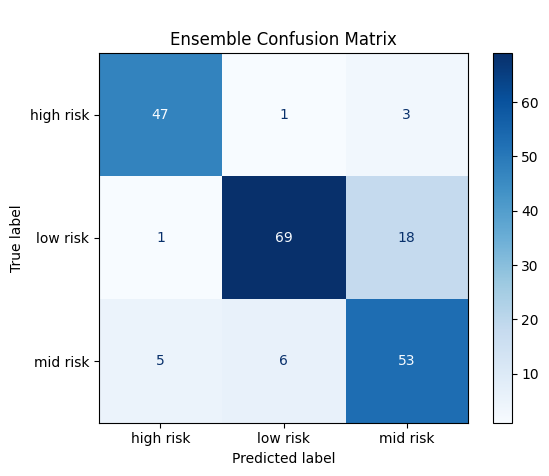


 Multi-Class AUC-ROC Score:  0.9507861827652624 



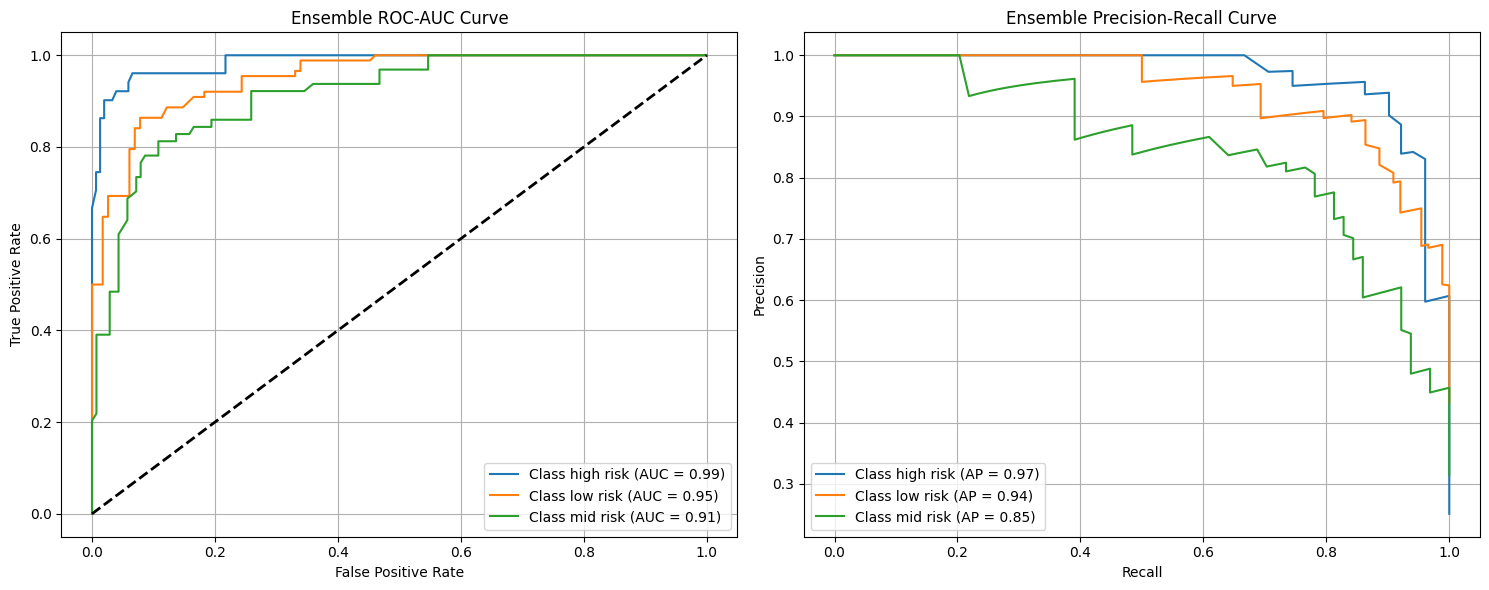

In [ ]:
# Classification Report
ensemble_y_pred = ensemble.predict(Xtest)
print("The Ensemble Classification Report on Test Data:")
print(classification_report(ytest, ensemble_y_pred, target_names=le.classes_))

# Confusion Matrix
ensemble_conf_matrix = confusion_matrix(ytest, ensemble_y_pred)
ConfusionMatrixDisplay(ensemble_conf_matrix, display_labels=le.classes_).plot(cmap='Blues')
plt.title("\nEnsemble Confusion Matrix")
plt.show()


# ROC-AUC for Ensemble
ensemble_y_pred_prob = ensemble.predict_proba(Xtest)

roc_auc_mclass_en = roc_auc_score(ytest_binarized, ensemble_y_pred_prob, average='macro', multi_class='ovr')
print('\n', "Multi-Class AUC-ROC Score: ", roc_auc_mclass_en, '\n')

# ROC-AUC and Precision-Recall curves side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# ROC-AUC Curve
fpr_ensemble, tpr_ensemble, roc_auc_ensemble = {}, {}, {}
for i in range(len(le.classes_)):
    fpr_ensemble[i], tpr_ensemble[i], _ = roc_curve(ytest_binarized[:, i], ensemble_y_pred_prob[:, i])
    roc_auc_ensemble[i] = auc(fpr_ensemble[i], tpr_ensemble[i])
    axes[0].plot(fpr_ensemble[i], tpr_ensemble[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc_ensemble[i]:.2f})')

axes[0].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0].set_title("Ensemble ROC-AUC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Precision-Recall Curve
precision_ensemble, recall_ensemble, ap_ensemble = {}, {}, {}
for i in range(len(le.classes_)):
    precision_ensemble[i], recall_ensemble[i], _ = precision_recall_curve(ytest_binarized[:, i], ensemble_y_pred_prob[:, i])
    ap_ensemble[i] = auc(recall_ensemble[i], precision_ensemble[i])
    axes[1].plot(recall_ensemble[i], precision_ensemble[i], label=f'Class {le.classes_[i]} (AP = {ap_ensemble[i]:.2f})')

axes[1].set_title("Ensemble Precision-Recall Curve")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend(loc="best")
axes[1].grid()

plt.tight_layout()
plt.show()


COMPARISON OF EVALUATION METRICES

In [ ]:
# comparison of the evaluation metrices across the four models

metrics = {
    "Model": ["Decision Tree", "Random Forest", "SVC", "Ensemble"],
    "Accuracy": [test_accuracy, rf_test_accuracy, svc_test_accuracy, ensemble_test_accuracy],
    "ROC_AUC": [roc_auc_mclass, roc_auc_mclass_rf, roc_auc_mclass_svc, roc_auc_mclass_en],
}

# Create and display the comparison table
metrics_df = pd.DataFrame(metrics)

#print(metrics_df, '\n')

# Visualization of evaluation metrics
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', hue='Model', data=metrics_df, palette='viridis', legend=False)
plt.title('\nComparison of Model Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
#plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='ROC_AUC', hue='Model', data=metrics_df, palette='viridis', legend=False)
plt.title('\nComparison of Model ROC-AUC')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for ROC-AUC
#plt.show()

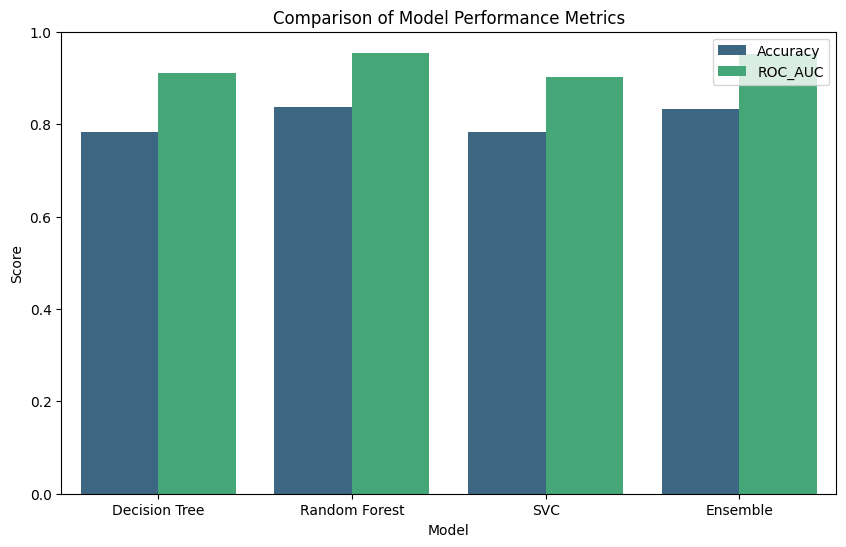

In [ ]:
# comparison of the evaluation metrices across the four models

# Data for the bar plot
metrics = {
    "Model": ["Decision Tree", "Random Forest", "SVC", "Ensemble",
              "Decision Tree", "Random Forest", "SVC", "Ensemble"],
    "Metric": ["Accuracy", "Accuracy", "Accuracy", "Accuracy",
               "ROC_AUC", "ROC_AUC", "ROC_AUC", "ROC_AUC"],
    "Score": [test_accuracy, rf_test_accuracy, svc_test_accuracy, ensemble_test_accuracy,
              roc_auc_mclass, roc_auc_mclass_rf, roc_auc_mclass_svc, roc_auc_mclass_en]
}

metrics_df = pd.DataFrame(metrics)

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for both metrics
plt.legend(loc='upper right')  # Adjust legend position if needed
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, auc, precision_recall_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Binarize the multi-class target
ytest_binarized = label_binarize(ytest, classes=np.arange(len(le.classes_)))

rf_model = best_rf
svc_model = best_svc
tree_model = best_tree
ensemble_model = ensemble



# Store results
results = {}

# Function to evaluate a model
def evaluate_model(model, model_name):
    # Predict probabilities and classes
    y_pred = model.predict(Xtest)
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(Xtest)
    elif hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(Xtest)

    # Compute metrics
    class_report = classification_report(ytest, y_pred, target_names=le.classes_, output_dict=True)
    conf_matrix = confusion_matrix(ytest, y_pred)
    auc_roc = roc_auc_score(ytest_binarized, y_pred_prob, average='macro', multi_class='ovr')
    avg_precision = average_precision_score(ytest_binarized, y_pred_prob, average='macro')

    # Save metrics
    results[model_name] = {
        "Classification Report": class_report,
        "Confusion Matrix": conf_matrix,
        "AUC-ROC": auc_roc,
        "AP": avg_precision
    }

    # Print metrics
    #print(f"\n=== {model_name} ===")
    #print("Classification Report:")
    #print(pd.DataFrame(class_report).T)
    #print("\nConfusion Matrix:")
    #print(conf_matrix)
    #print(f"\nAUC-ROC: {auc_roc:.4f}")
    #print(f"Average Precision (AP): {avg_precision:.4f}")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(le.classes_)):
        fpr[i], tpr[i], _ = roc_curve(ytest_binarized[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {le.classes_[i]} (AUC={roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    #plt.show()

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    precision, recall, pr_auc = {}, {}, {}
    for i in range(len(le.classes_)):
        precision[i], recall[i], _ = precision_recall_curve(ytest_binarized[:, i], y_pred_prob[:, i])
        pr_auc[i] = auc(recall[i], precision[i])
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {le.classes_[i]} (AP={pr_auc[i]:.2f})')
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="lower left")
    plt.grid(alpha=0.3)
   # plt.show()

# Evaluate each model
evaluate_model(rf_model, "Random Forest")
evaluate_model(svc_model, "SVC")
evaluate_model(tree_model, "Decision Tree")
evaluate_model(ensemble_model, "Ensemble")

# Compare results
comparison_df = pd.DataFrame({
    model: {
        "AUC-ROC": metrics["AUC-ROC"],
        "AP": metrics["AP"]
    }
    for model, metrics in results.items()
}).T

#print("\n=== Model Comparison ===")
#print(comparison_df)


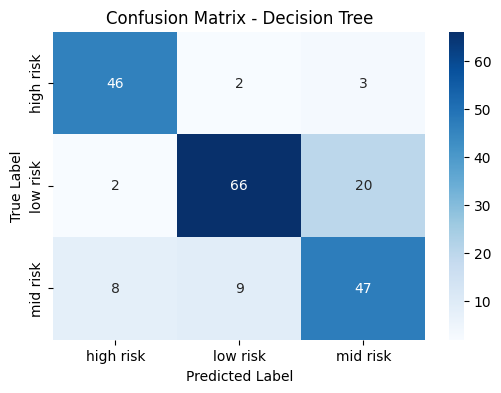

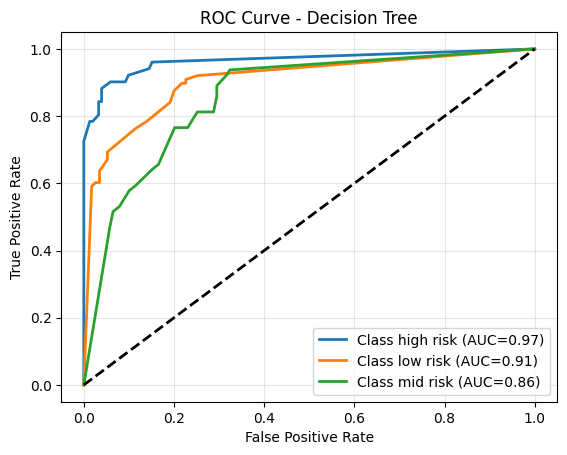

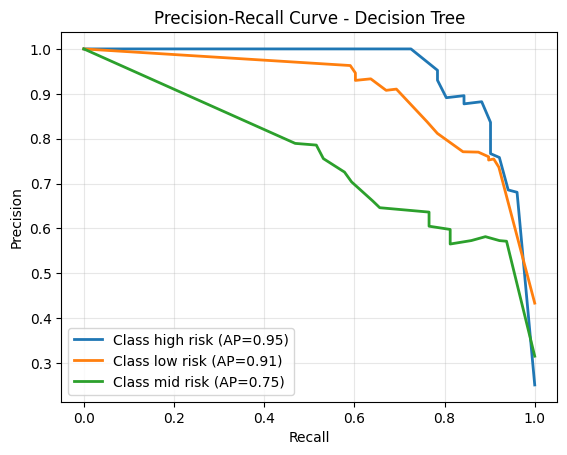

Classification Report - Decision Tree:

              precision    recall  f1-score     support
high risk      0.821429  0.901961  0.859813   51.000000
low risk       0.857143  0.750000  0.800000   88.000000
mid risk       0.671429  0.734375  0.701493   64.000000
accuracy       0.783251  0.783251  0.783251    0.783251
macro avg      0.783333  0.795445  0.787102  203.000000
weighted avg   0.789620  0.783251  0.783970  203.000000




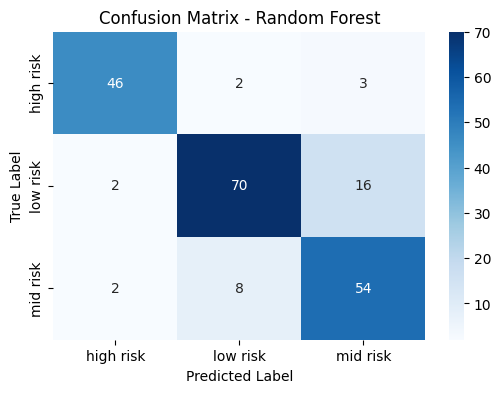

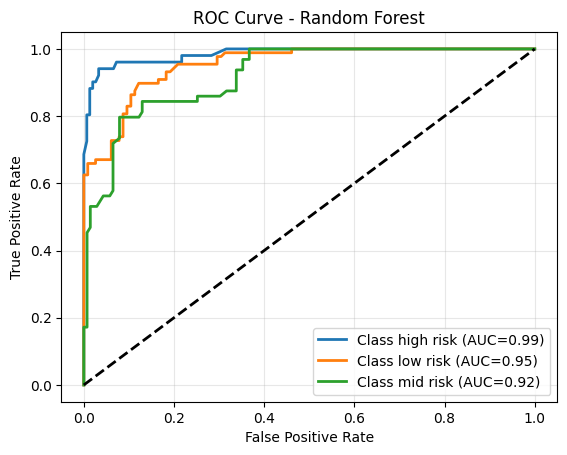

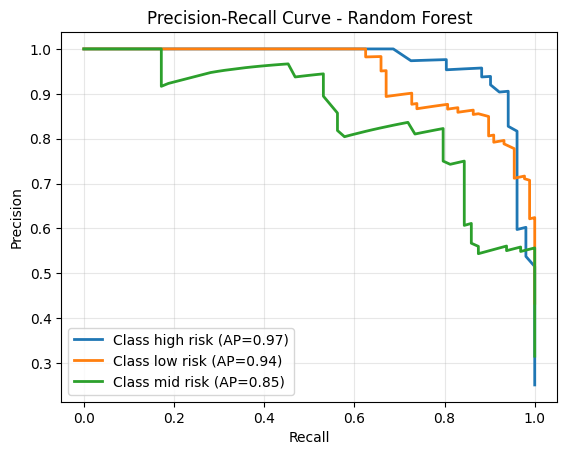

Classification Report - Random Forest:

              precision    recall  f1-score     support
high risk      0.920000  0.901961  0.910891   51.000000
low risk       0.875000  0.795455  0.833333   88.000000
mid risk       0.739726  0.843750  0.788321   64.000000
accuracy       0.837438  0.837438  0.837438    0.837438
macro avg      0.844909  0.847055  0.844182  203.000000
weighted avg   0.843657  0.837438  0.838627  203.000000




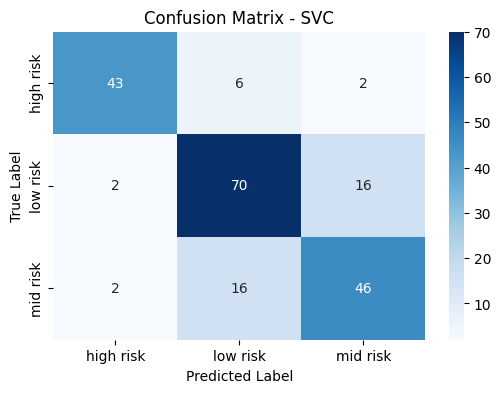

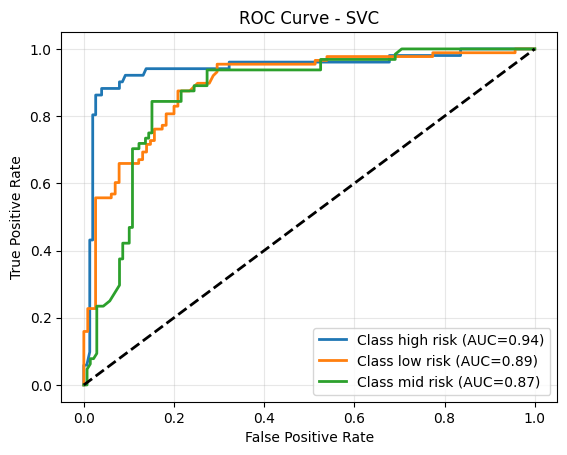

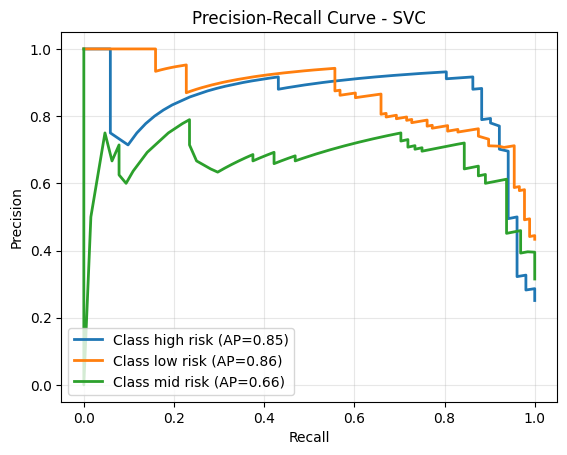

Classification Report - SVC:

              precision    recall  f1-score     support
high risk      0.914894  0.843137  0.877551   51.000000
low risk       0.760870  0.795455  0.777778   88.000000
mid risk       0.718750  0.718750  0.718750   64.000000
accuracy       0.783251  0.783251  0.783251    0.783251
macro avg      0.798171  0.785781  0.791360  203.000000
weighted avg   0.786286  0.783251  0.784234  203.000000




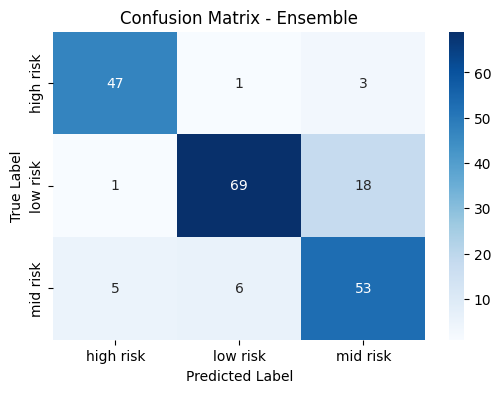

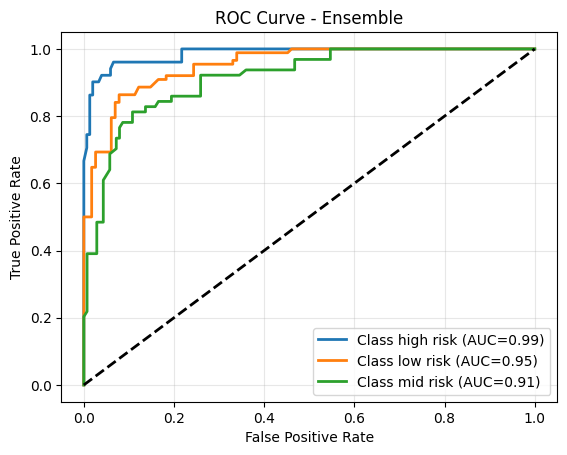

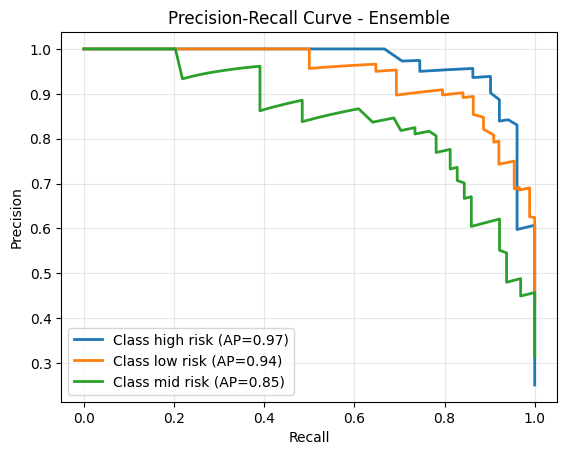

Classification Report - Ensemble:

              precision    recall  f1-score     support
high risk      0.886792  0.921569  0.903846   51.000000
low risk       0.907895  0.784091  0.841463   88.000000
mid risk       0.716216  0.828125  0.768116   64.000000
accuracy       0.832512  0.832512  0.832512    0.832512
macro avg      0.836968  0.844595  0.837809  203.000000
weighted avg   0.842163  0.832512  0.834012  203.000000




In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


# Binarize the multi-class target
ytest_binarized = label_binarize(ytest, classes=np.arange(len(le.classes_)))

# Models to evaluate
models = {
    "Decision Tree": best_tree,
    "Random Forest": best_rf,
    "SVC": best_svc,
    "Ensemble": ensemble
}

# Function to evaluate and plot metrics
def evaluate_and_plot(model, model_name):
    y_pred = model.predict(Xtest)
    y_pred_prob = model.predict_proba(Xtest)  # Assuming all models have predict_proba

    # Confusion Matrix
    cm = confusion_matrix(ytest, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC-AUC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(le.classes_)):
        fpr[i], tpr[i], _ = roc_curve(ytest_binarized[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {le.classes_[i]} (AUC={roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

    # Precision-Recall Curve
    precision, recall, pr_auc = {}, {}, {}
    for i in range(len(le.classes_)):
        precision[i], recall[i], _ = precision_recall_curve(ytest_binarized[:, i], y_pred_prob[:, i])
        pr_auc[i] = auc(recall[i], precision[i])
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {le.classes_[i]} (AP={pr_auc[i]:.2f})')
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="lower left")
    plt.grid(alpha=0.3)
    plt.show()

    # Classification Report
    report = classification_report(ytest, y_pred, target_names=le.classes_, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(f"Classification Report - {model_name}:\n")
    print(report_df)
    print("\n" + "=" * 50 + "\n")  # Separator between models

# Evaluate and plot for each model
for model_name, model in models.items():
    evaluate_and_plot(model, model_name)

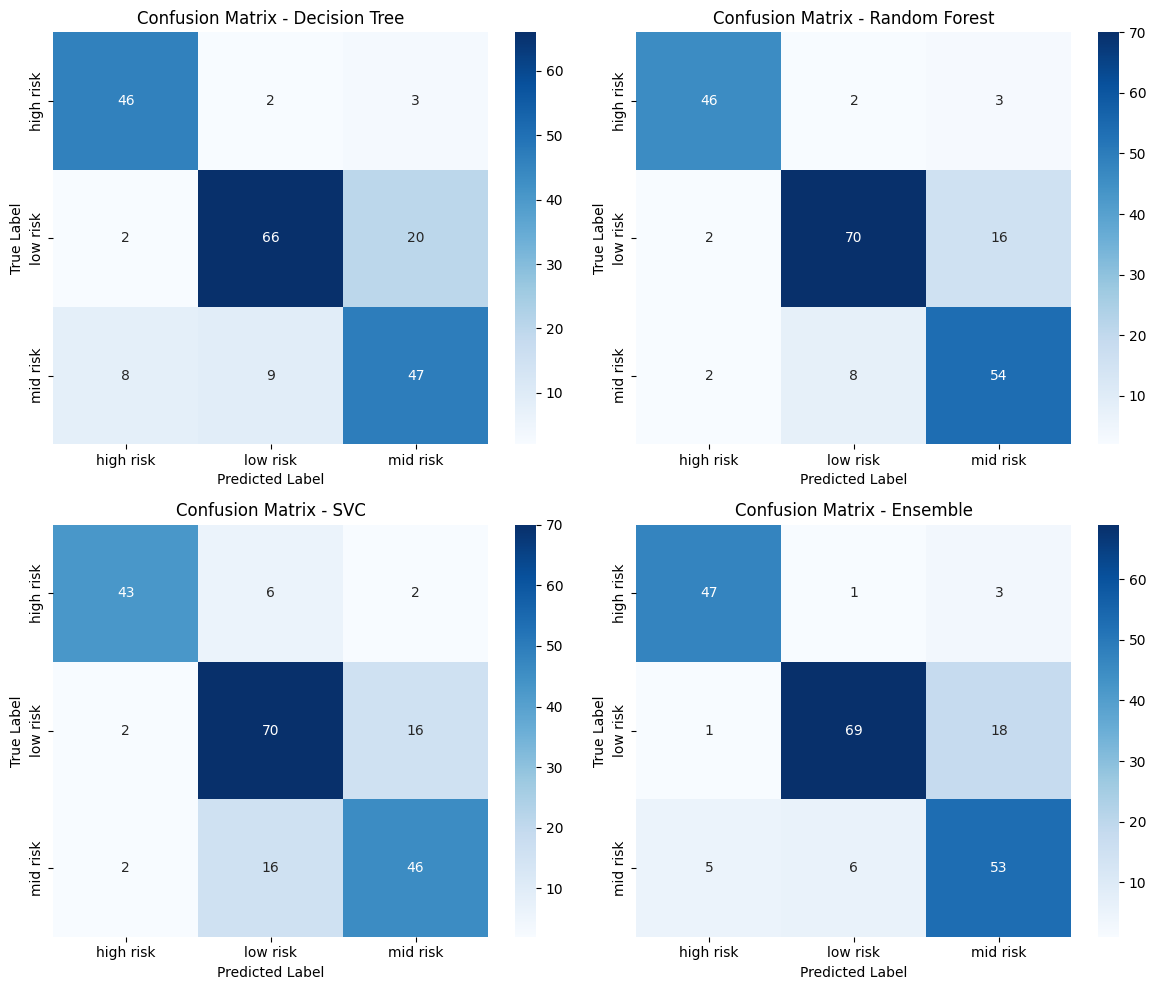

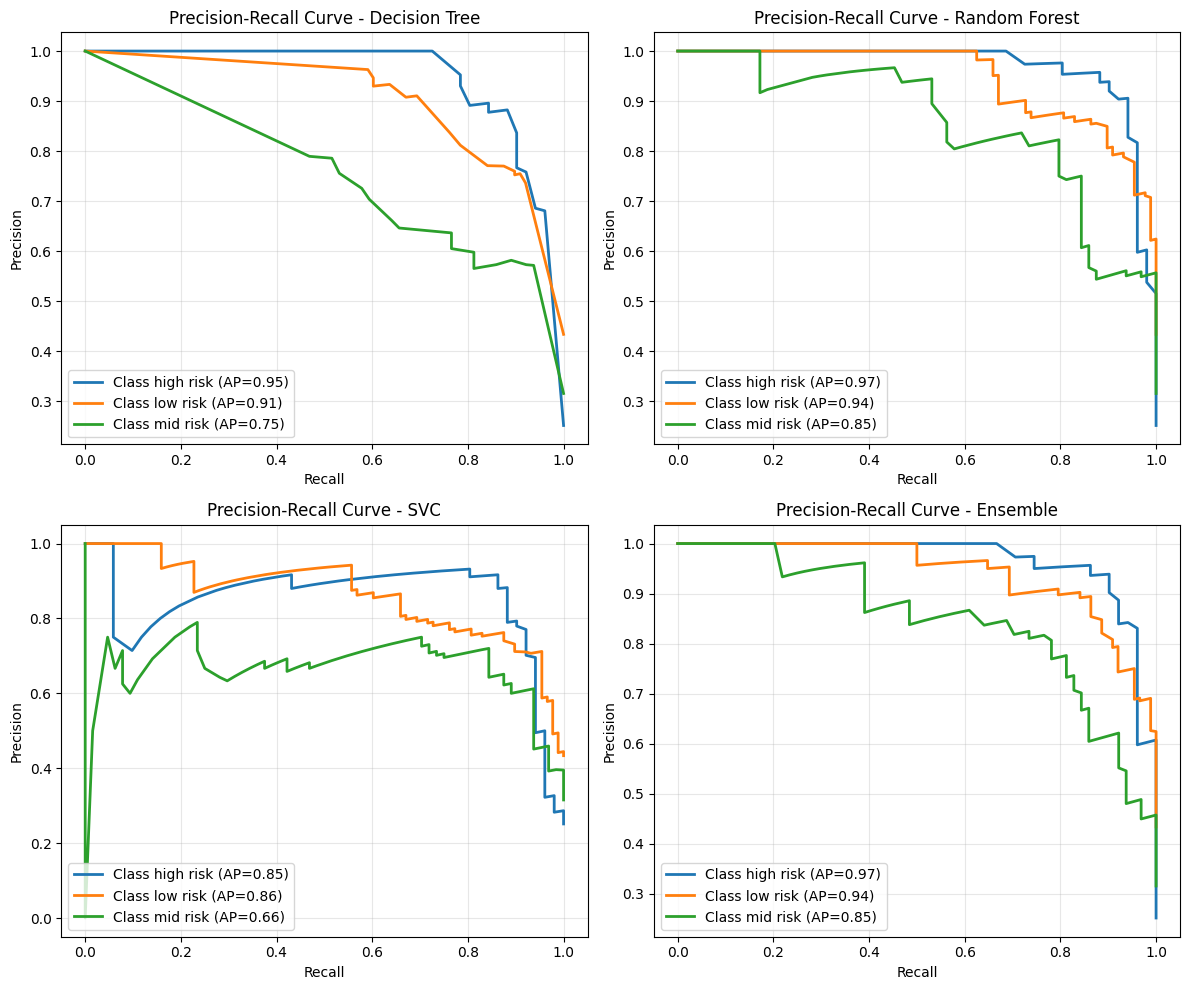

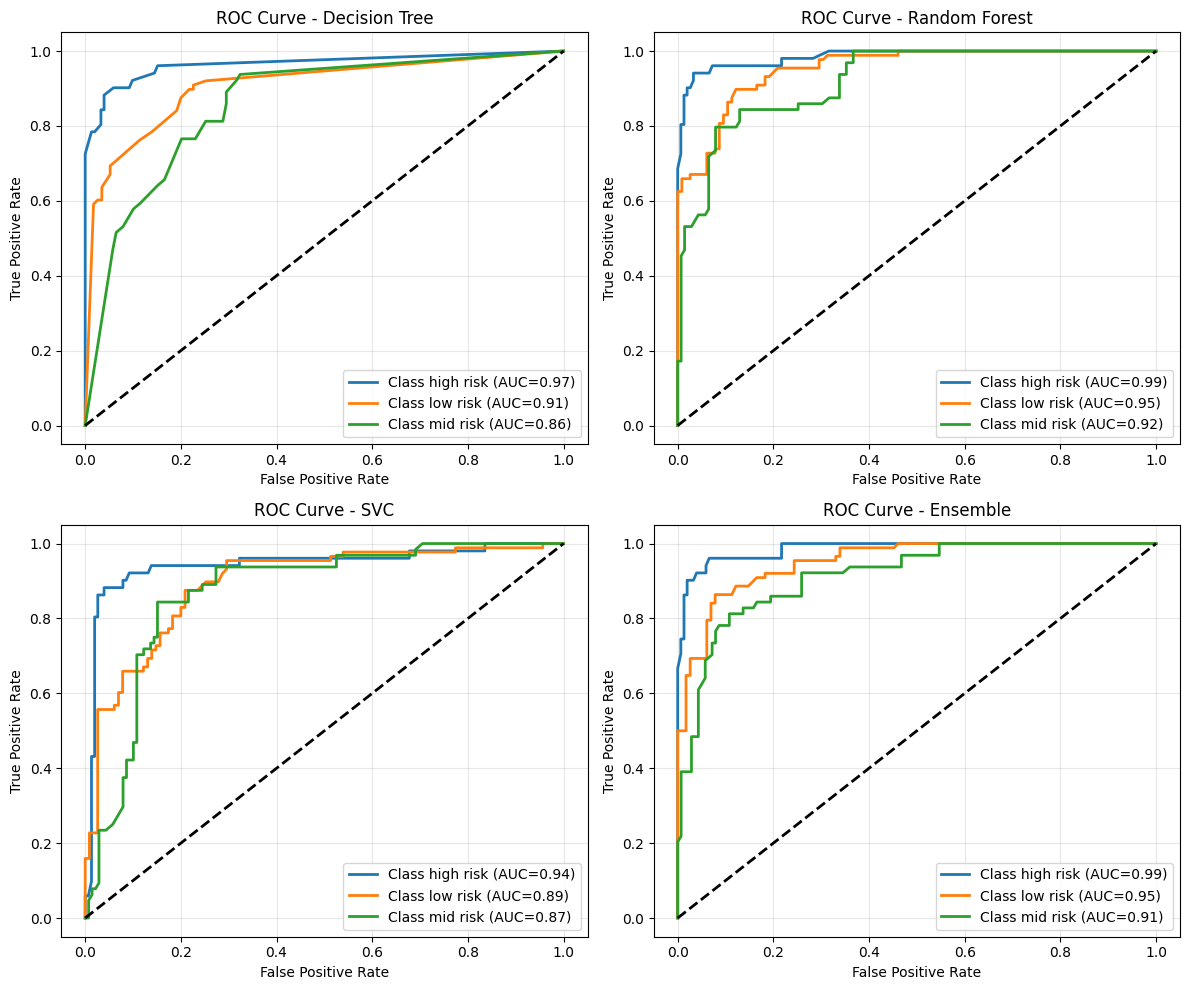

Classification Report - Decision Tree:

              precision    recall  f1-score     support
high risk      0.821429  0.901961  0.859813   51.000000
low risk       0.857143  0.750000  0.800000   88.000000
mid risk       0.671429  0.734375  0.701493   64.000000
accuracy       0.783251  0.783251  0.783251    0.783251
macro avg      0.783333  0.795445  0.787102  203.000000
weighted avg   0.789620  0.783251  0.783970  203.000000


Classification Report - Random Forest:

              precision    recall  f1-score     support
high risk      0.920000  0.901961  0.910891   51.000000
low risk       0.875000  0.795455  0.833333   88.000000
mid risk       0.739726  0.843750  0.788321   64.000000
accuracy       0.837438  0.837438  0.837438    0.837438
macro avg      0.844909  0.847055  0.844182  203.000000
weighted avg   0.843657  0.837438  0.838627  203.000000


Classification Report - SVC:

              precision    recall  f1-score     support
high risk      0.914894  0.843137  0.877551   

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, auc, precision_recall_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Binarize the multi-class target
ytest_binarized = label_binarize(ytest, classes=np.arange(len(le.classes_)))

# Models to evaluate
models = {
    "Decision Tree": best_tree,
    "Random Forest": best_rf,
    "SVC": best_svc,
    "Ensemble": ensemble
}

# Function to get predictions and probabilities
def get_predictions(model):
    y_pred = model.predict(Xtest)
    y_pred_prob = model.predict_proba(Xtest)  # Assuming all models have predict_proba
    return y_pred, y_pred_prob

# --- Confusion Matrix Heatmaps ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easier iteration

for i, (model_name, model) in enumerate(models.items()):
    y_pred, _ = get_predictions(model)
    cm = confusion_matrix(ytest, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {model_name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# --- Precision-Recall Curves ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
    _, y_pred_prob = get_predictions(model)
    precision, recall, pr_auc = {}, {}, {}
    for j in range(len(le.classes_)):
        precision[j], recall[j], _ = precision_recall_curve(ytest_binarized[:, j], y_pred_prob[:, j])
        pr_auc[j] = auc(recall[j], precision[j])
        axes[i].plot(recall[j], precision[j], lw=2, label=f'Class {le.classes_[j]} (AP={pr_auc[j]:.2f})')
    axes[i].set_title(f"Precision-Recall Curve - {model_name}")
    axes[i].set_xlabel("Recall")
    axes[i].set_ylabel("Precision")
    axes[i].legend(loc="lower left")
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# --- ROC-AUC Curves ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
    _, y_pred_prob = get_predictions(model)
    fpr, tpr, roc_auc = {}, {}, {}
    for j in range(len(le.classes_)):
        fpr[j], tpr[j], _ = roc_curve(ytest_binarized[:, j], y_pred_prob[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
        axes[i].plot(fpr[j], tpr[j], lw=2, label=f'Class {le.classes_[j]} (AUC={roc_auc[j]:.2f})')
    axes[i].plot([0, 1], [0, 1], 'k--', lw=2)
    axes[i].set_title(f"ROC Curve - {model_name}")
    axes[i].set_xlabel("False Positive Rate")
    axes[i].set_ylabel("True Positive Rate")
    axes[i].legend(loc="lower right")
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# --- Classification Reports ---
for i, (model_name, model) in enumerate(models.items()):
    y_pred, _ = get_predictions(model)
    report = classification_report(ytest, y_pred, target_names=le.classes_, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(f"Classification Report - {model_name}:\n")
    print(report_df)
    print("\n" + "=" * 50 + "\n")

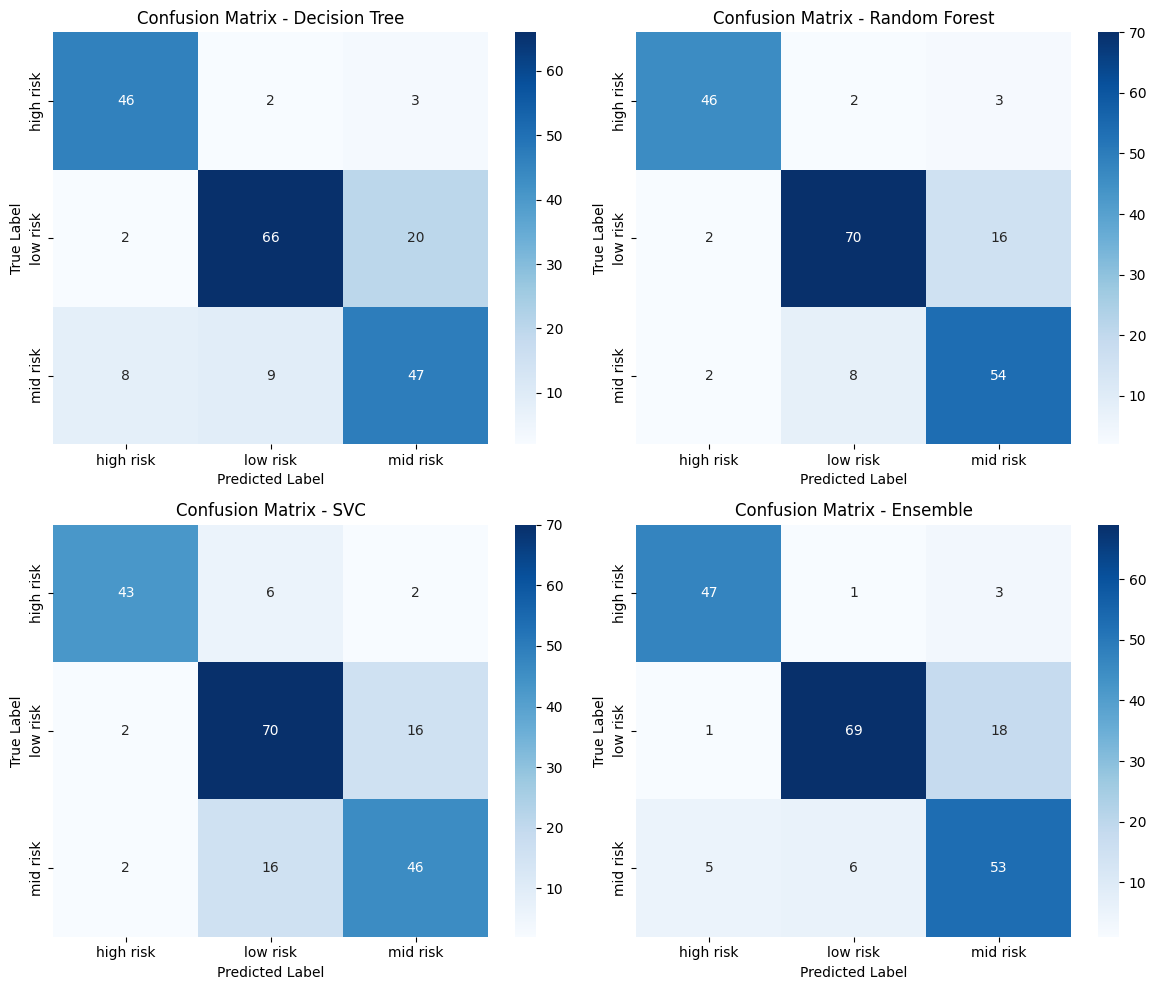

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


# Binarize the multi-class target
ytest_binarized = label_binarize(ytest, classes=np.arange(len(le.classes_)))

# Models to evaluate
models = {
    "Decision Tree": best_tree,
    "Random Forest": best_rf,
    "SVC": best_svc,
    "Ensemble": ensemble}

def get_predictions(model):
    y_pred = model.predict(Xtest)
    y_pred_prob = model.predict_proba(Xtest)  # Assuming all models have predict_proba
    return y_pred, y_pred_prob

# CONFUSION MATRIX FOR THE 4MODELS
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easier iteration

for i, (model_name, model) in enumerate(models.items()):
    y_pred, _ = get_predictions(model)
    cm = confusion_matrix(ytest, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {model_name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

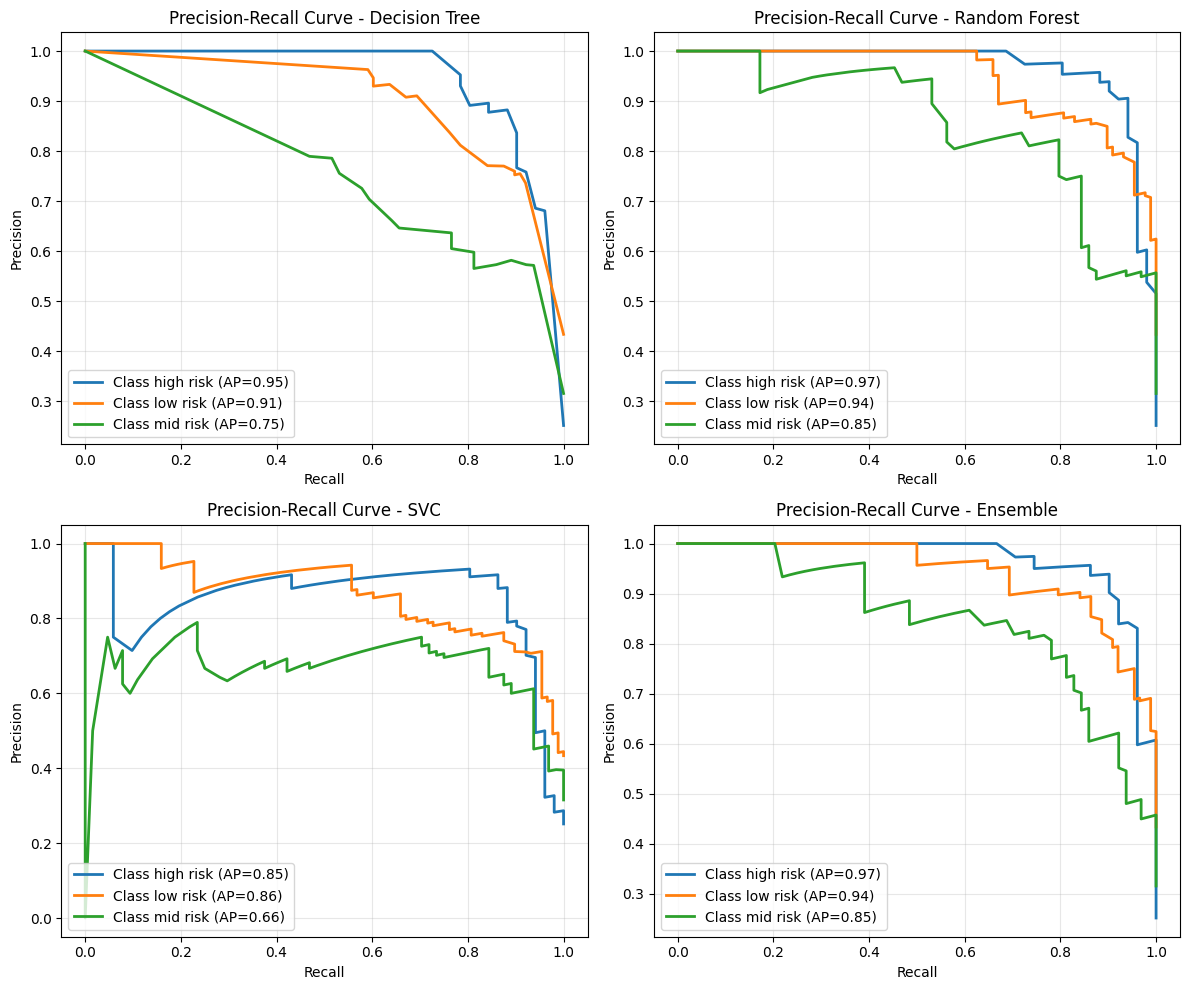

In [ ]:
# PRECISION RECALL CURVES FOR THE FOUR MODELS
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
       _, y_pred_prob = get_predictions(model)
       precision, recall, pr_auc = {}, {}, {}
       for j in range(len(le.classes_)):
           precision[j], recall[j], _ = precision_recall_curve(ytest_binarized[:, j], y_pred_prob[:, j])
           pr_auc[j] = auc(recall[j], precision[j])
           axes[i].plot(recall[j], precision[j], lw=2, label=f'Class {le.classes_[j]} (AP={pr_auc[j]:.2f})')
       axes[i].set_title(f"Precision-Recall Curve - {model_name}")
       axes[i].set_xlabel("Recall")
       axes[i].set_ylabel("Precision")
       axes[i].legend(loc="lower left")
       axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

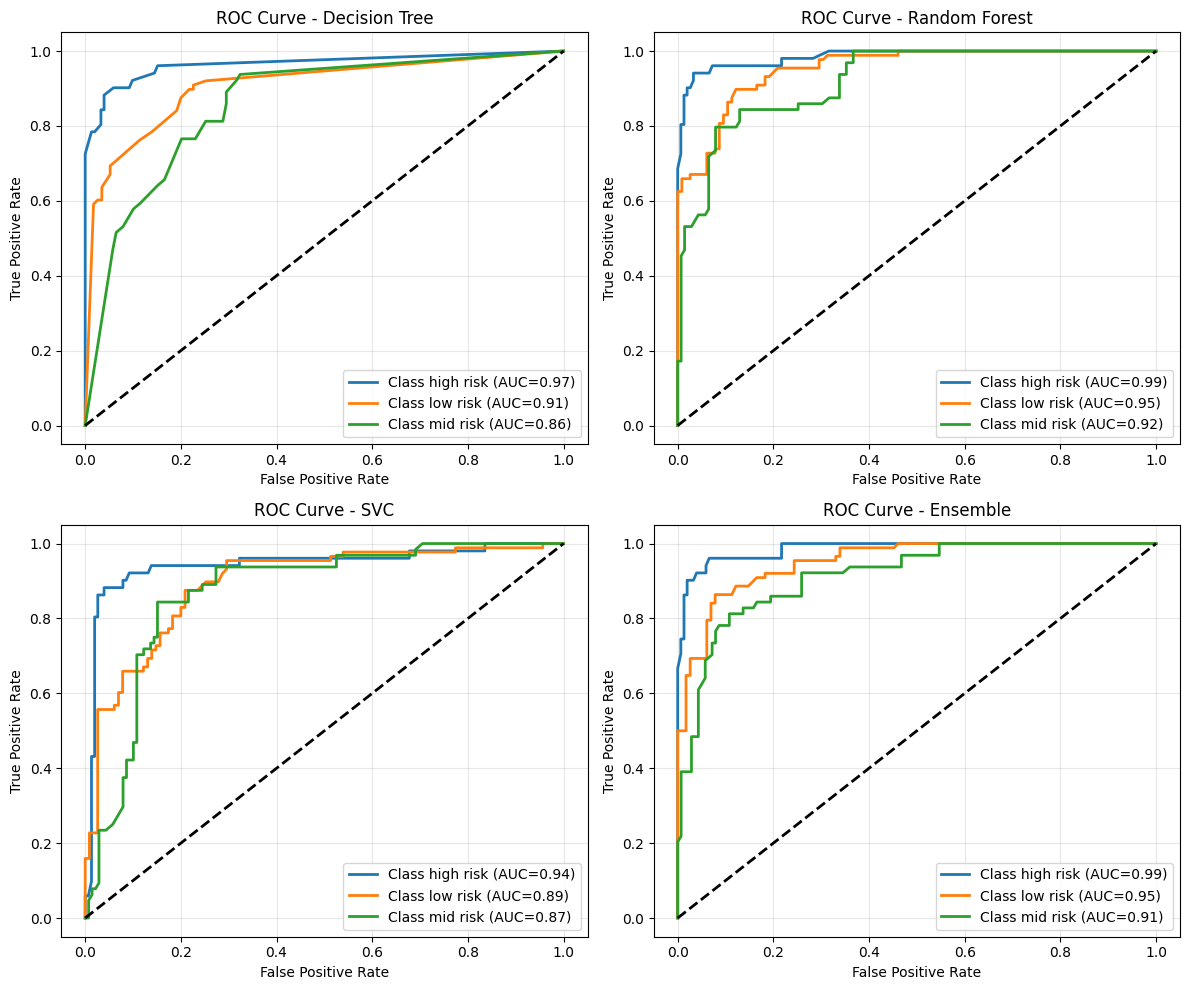

In [ ]:
# ROC-AUC CURVES FOR THE FOUR MODELS
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
       _, y_pred_prob = get_predictions(model)
       fpr, tpr, roc_auc = {}, {}, {}
       for j in range(len(le.classes_)):
           fpr[j], tpr[j], _ = roc_curve(ytest_binarized[:, j], y_pred_prob[:, j])
           roc_auc[j] = auc(fpr[j], tpr[j])
           axes[i].plot(fpr[j], tpr[j], lw=2, label=f'Class {le.classes_[j]} (AUC={roc_auc[j]:.2f})')
       axes[i].plot([0, 1], [0, 1], 'k--', lw=2)
       axes[i].set_title(f"ROC Curve - {model_name}")
       axes[i].set_xlabel("False Positive Rate")
       axes[i].set_ylabel("True Positive Rate")
       axes[i].legend(loc="lower right")
       axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# CLASSIFICATION REPORTS FOR THE FOUR MODELS

for i, (model_name, model) in enumerate(models.items()):
       y_pred, _ = get_predictions(model)
       report = classification_report(ytest, y_pred, target_names=le.classes_, output_dict=True)
       report_df = pd.DataFrame(report).transpose()
       print(f"Classification Report - {model_name}:\n")
       print(report_df)
       print("\n" + "=" * 50 + "\n")

Classification Report - Decision Tree:

              precision    recall  f1-score     support
high risk      0.821429  0.901961  0.859813   51.000000
low risk       0.857143  0.750000  0.800000   88.000000
mid risk       0.671429  0.734375  0.701493   64.000000
accuracy       0.783251  0.783251  0.783251    0.783251
macro avg      0.783333  0.795445  0.787102  203.000000
weighted avg   0.789620  0.783251  0.783970  203.000000


Classification Report - Random Forest:

              precision    recall  f1-score     support
high risk      0.920000  0.901961  0.910891   51.000000
low risk       0.875000  0.795455  0.833333   88.000000
mid risk       0.739726  0.843750  0.788321   64.000000
accuracy       0.837438  0.837438  0.837438    0.837438
macro avg      0.844909  0.847055  0.844182  203.000000
weighted avg   0.843657  0.837438  0.838627  203.000000


Classification Report - SVC:

              precision    recall  f1-score     support
high risk      0.914894  0.843137  0.877551   